In [191]:
#Importing packages
import numpy as np
import pandas as pd

# Importing matplotlib and seaborn for graphs
import matplotlib.pyplot as plt
import seaborn as sns

#Import packages for remove warnings
import warnings
warnings.filterwarnings('ignore')

# Import the MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

# Train & Test data split
from sklearn.model_selection import train_test_split

# Importing RFE and LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Confusion Matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

# Statsmodel
import statsmodels.api as sm

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

from ipywidgets import interact, interactive, fixed, interact_manual


# Glimpse of Data
 - Loading "./Leads.csv"
 - How many Rows and Columns
 - Getting the names of the Columns of Lead Score data
 - Removing duplicates if any
 - Removing the data based on uniqueness of the data

In [192]:
lead_score_data = pd.read_csv("./Leads.csv")
lead_score_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [193]:
lead_score_data.shape

(9240, 37)

In [194]:
lead_score_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [195]:
# Dropping Duplicates if any
lead_score_data=lead_score_data.drop_duplicates()
lead_score_data.shape

# No duplicates found.

(9240, 37)

In [196]:
lead_score_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

# Inferences

 - Clearly **Prospect ID & Lead Number** are two variables that are just indicative of the ID number of the Contacted People & can be dropped.
 - Those features which have only **one unique (set No)** value are :
    - **Magazine**
    - **Recieve More updates about the course**
    - **Update me on Supply chain content**
    - **Get updates on DM content**
    - **I agree to pay the amount through cheque** 
 
- These features show no variance and thus all the leads have chosen one option, thus this feature doesnt make any impact or difference on conversion of leads


In [197]:
#dropping Lead Number and Prospect ID since they have all unique values
lead_score_data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [198]:
# Dropping Magazine ,Receive More Updates About Our Courses ,Update me on Supply Chain Content , Get updates on DM Content' &
# 'I agree to pay the amount through cheque' as these features show no variance
lead_score_data.drop(['Magazine','Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
            'Get updates on DM Content','I agree to pay the amount through cheque'], 1, inplace = True)


# Data Cleaning
 - Identifying Null values

In [199]:
# As we can observe that there are select values for many column.
# This is because customer did not select any option from the list, hence it shows select.
# Select values are as good as NULL.

# Converting 'Select' values to NaN.
lead_score_data = lead_score_data.replace('Select', np.nan)


## Identifying the Null values

In [200]:
#Identifying Missing data
total_null = lead_score_data.isnull().sum().sort_values(ascending = False)
percent = ((lead_score_data.isnull().sum()/lead_score_data.isnull().count())*100).sort_values(ascending = False)
print("Total records (lead Score Data) = ", lead_score_data.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(20)

Total records (lead Score Data) =  9240


,Total Missing,In Percent
How did you hear about X Education,7250,78.46
Lead Profile,6855,74.19
Lead Quality,4767,51.59
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Asymmetrique Activity Index,4218,45.65
City,3669,39.71
Specialization,3380,36.58
Tags,3353,36.29


In [201]:
#Based on the above data, removing columns with more than 6000 (i.e higher than 70%)
lead_score_data = lead_score_data[lead_score_data.columns[lead_score_data.isnull().sum() < 6000]]
lead_score_data.shape

(9240, 28)

## Lets have a closer look to other Null values.

In [202]:
# Custom function.
# Frequency of each feature in percentage.
def bar_plot_percentage(df, colnames, sortbyindex=False):
    fig = plt.figure(figsize=(20, 50))
    fig.set_facecolor("lightgrey")
    string = "Frequency of "
    for colname in colnames:
        plt.subplot(5,2,colnames.index(colname)+1)
        count = (df[colname].value_counts(normalize=True)*100)
        string += colname + ' in (%)'
        if sortbyindex:
                count = count.sort_index()
        count.plot.bar(color=sns.color_palette('dark'))
        plt.xticks(rotation = 60,fontsize=14,family="Comic Sans MS")
        plt.yticks(fontsize=14,family="Comic Sans MS")
        plt.ylabel(string, fontsize=14,family = "Comic Sans MS")
        plt.xlabel(colname, fontsize=14,family = "Comic Sans MS")
        string = "Frequency of "
        

In [203]:
#Function to plot a boxplot
def box_plot(df,colname):
    plt.figure(figsize=(20, 15))
    for var in colname:
        print(var)
        plt.subplot(2,2,colname.index(var)+1)
        sns.boxplot(x = var, data = df)
        plt.xlabel(var, fontsize=12,family = "Comic Sans MS")
    plt.show()

## Lead Quality & City
- Lead quality indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead
- Lead quality's highest frequency is of Select, which means we can not drop it and need to convert it to "Any Other"/ "Not Mentioned"

In [204]:
lead_score_data['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

In [205]:
lead_score_data['City'].describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

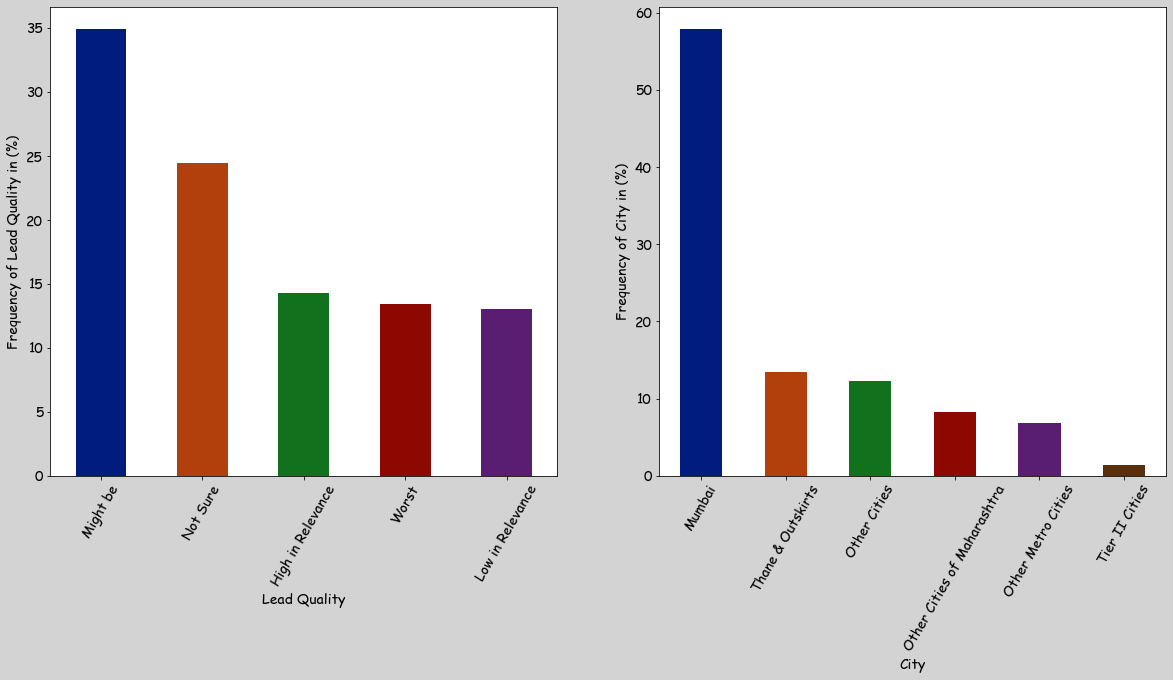

In [206]:
colnames = ['Lead Quality','City']
bar_plot_percentage(lead_score_data,colnames)

## Inference
- As Lead quality is based on the intution of employee, so if left 'Select' we can impute 'Not Sure' in NaN safely.
- Around 60% of the data is Mumbai so we can impute Mumbai in the missing values.

In [207]:
# As Lead quality is based on the intution of employee, so if left blank we can impute 'Not Sure' in NaN safely.
lead_score_data['Lead Quality'] = lead_score_data['Lead Quality'].replace(np.nan, 'Not Sure')
lead_score_data['City'] = lead_score_data['City'].replace(np.nan, 'Mumbai')

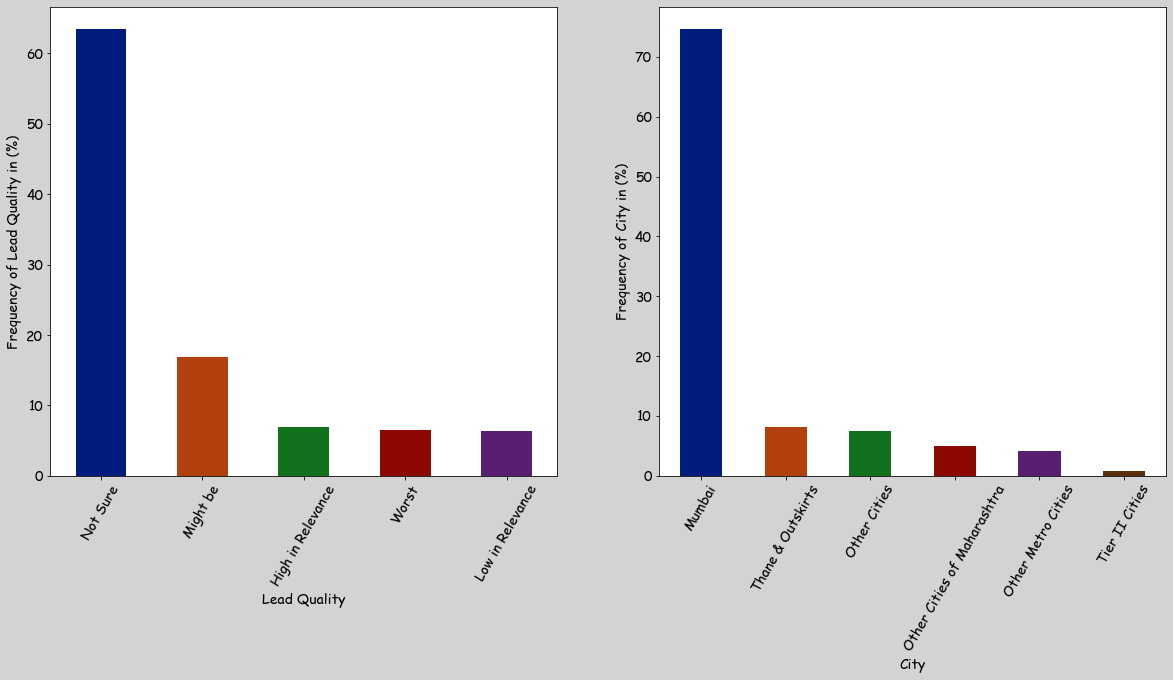

In [208]:
bar_plot_percentage(lead_score_data,colnames)

# Asymmetrique Profile Score, Asymmetrique Activity Score, Asymmetrique Profile Index, Asymmetrique Activity Index



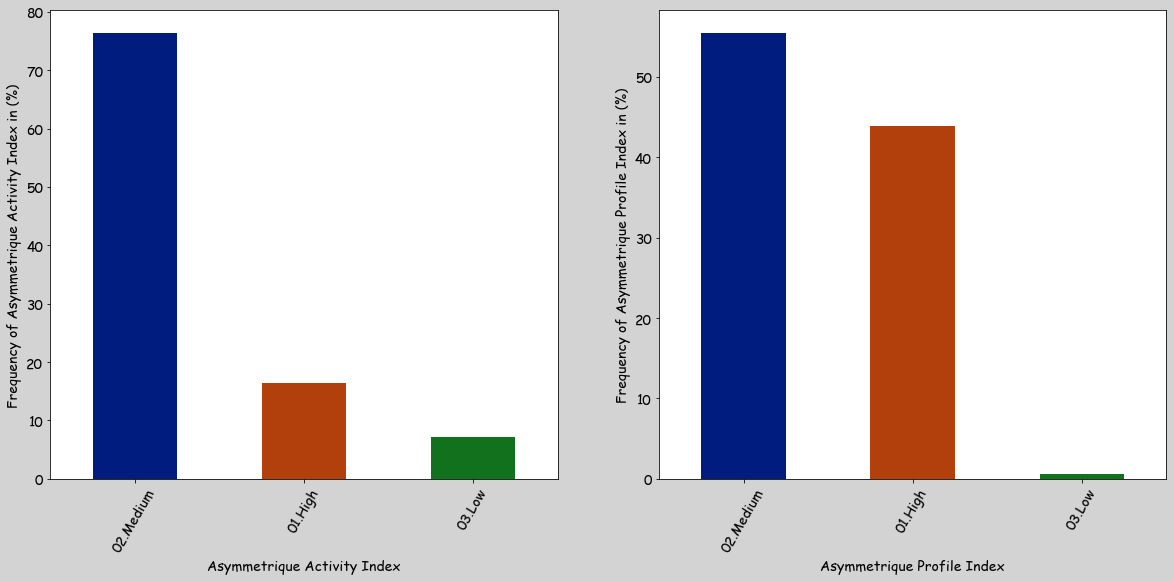

In [209]:
colnames = ['Asymmetrique Activity Index','Asymmetrique Profile Index']
bar_plot_percentage(lead_score_data,colnames)

Asymmetrique Activity Score
Asymmetrique Profile Score


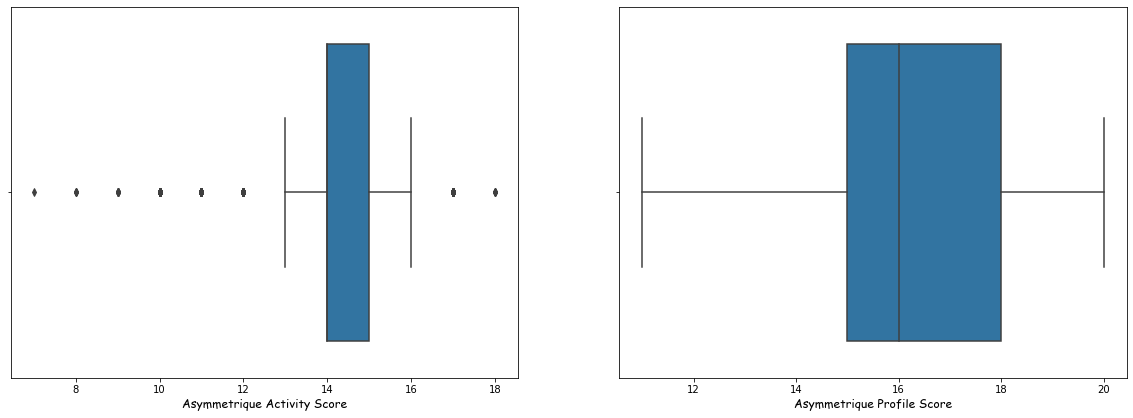

In [210]:
colnames = ['Asymmetrique Activity Score','Asymmetrique Profile Score']        
box_plot(lead_score_data,colnames)

## Inferences
- 45.6% of null values.
- There is too much variation in the parameters so its not reliable to impute any value in it.

We can drop the columns

In [211]:
# Dropping Asymmetrique Activity Index,'Asymmetrique Activity Score,Asymmetrique Profile Index & 
# Asymmetrique Profile Score since they have too much variations and Null vlues.
lead_score_data.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score',
                             'Asymmetrique Profile Index','Asymmetrique Profile Score'], 1, inplace = True)

In [212]:
lead_score_data.shape

(9240, 24)

## Specialzation 

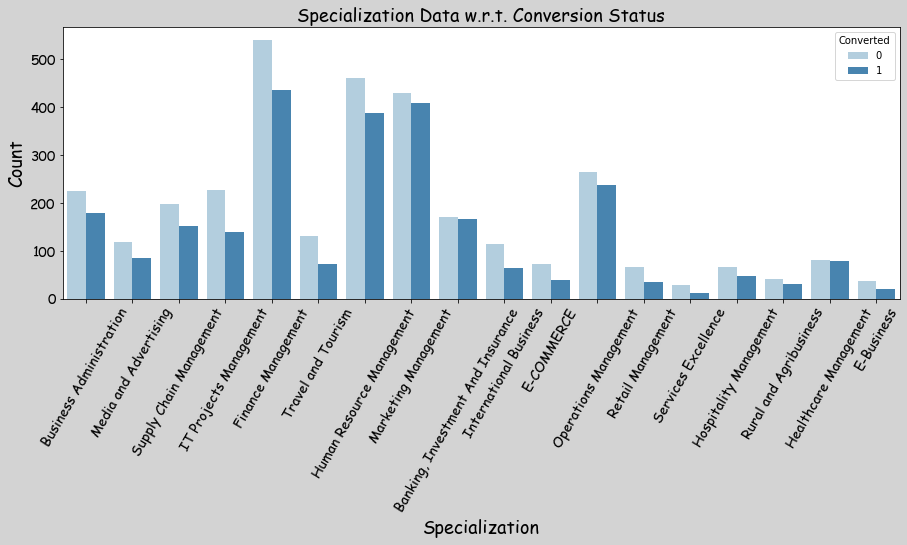

In [213]:
# Plotting spread of Specialization columnn 
fig = plt.figure(figsize=(15,5))
fig.set_facecolor("lightgrey")
sns.countplot(lead_score_data.Specialization,palette='Blues', hue=lead_score_data.Converted)
plt.xticks(rotation = 60,fontsize=14,family="Comic Sans MS")
plt.yticks(fontsize=14,family="Comic Sans MS")
plt.ylabel("Count", fontsize=18,family = "Comic Sans MS")
plt.xlabel("Specialization", fontsize=18,family = "Comic Sans MS")
plt.title("Specialization Data w.r.t. Conversion Status", fontsize=18,family = "Comic Sans MS")
plt.show()

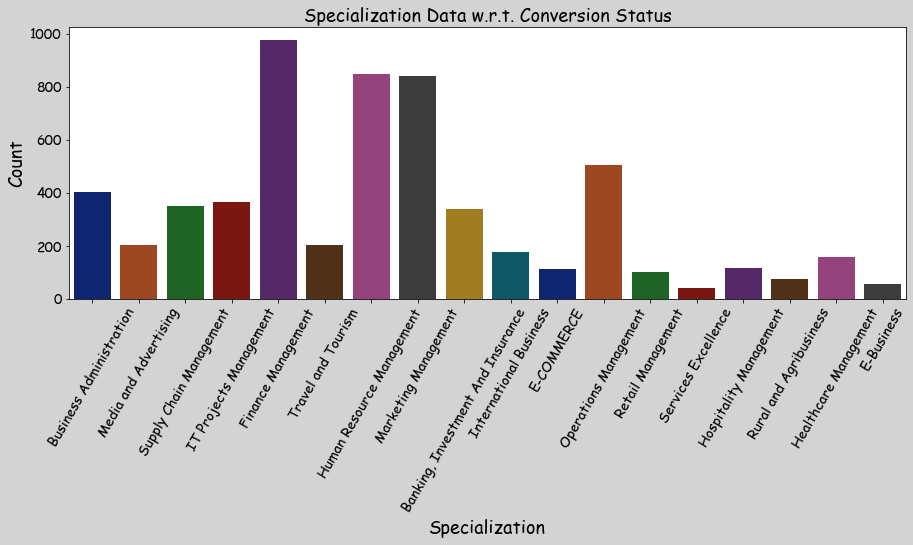

In [214]:
# Plotting spread of Specialization columnn 
fig = plt.figure(figsize=(15,5))
fig.set_facecolor("lightgrey")
sns.countplot(lead_score_data.Specialization,palette ='dark')
plt.xticks(rotation = 60,fontsize=14,family="Comic Sans MS")
plt.yticks(fontsize=14,family="Comic Sans MS")
plt.ylabel("Count", fontsize=18,family = "Comic Sans MS")
plt.xlabel("Specialization", fontsize=18,family = "Comic Sans MS")
plt.title("Specialization Data w.r.t. Conversion Status", fontsize=18,family = "Comic Sans MS")
plt.show()


## Inferences
- In this case it is possible that lead has option avaialable for his requirement.
- Hence we can make a category **"Others"** for missing values. 

In [215]:
lead_score_data['Specialization'] = lead_score_data['Specialization'].replace(np.nan, 'Others_Specialization')

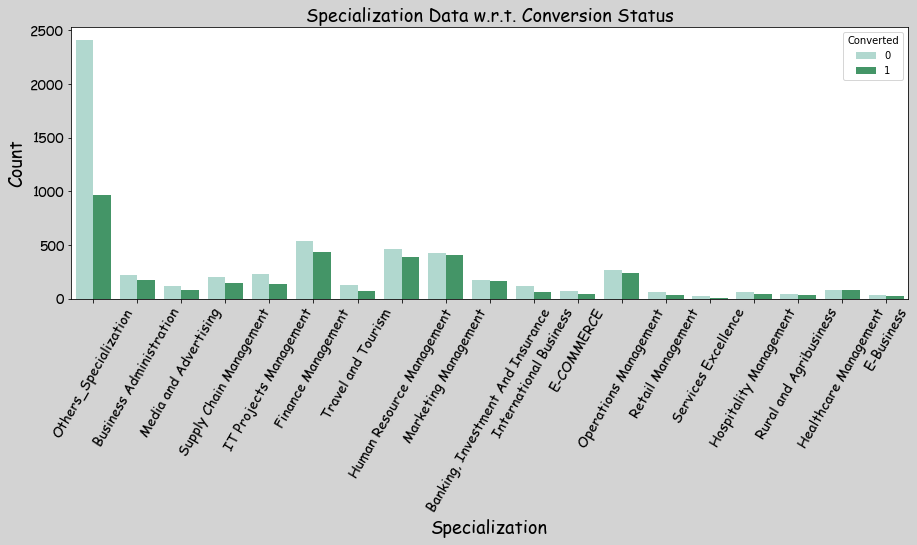

In [216]:
# Plotting spread of Specialization columnn 
fig = plt.figure(figsize=(15,5))
fig.set_facecolor("lightgrey")
sns.countplot(lead_score_data.Specialization,palette='BuGn', hue=lead_score_data.Converted)
plt.xticks(rotation = 60,fontsize=14,family="Comic Sans MS")
plt.yticks(fontsize=14,family="Comic Sans MS")
plt.ylabel("Count", fontsize=18,family = "Comic Sans MS")
plt.xlabel("Specialization", fontsize=18,family = "Comic Sans MS")
plt.title("Specialization Data w.r.t. Conversion Status", fontsize=18,family = "Comic Sans MS")
plt.show()

## Inference
- Focus should be more on the Specialization with high conversion rate.

# Tags

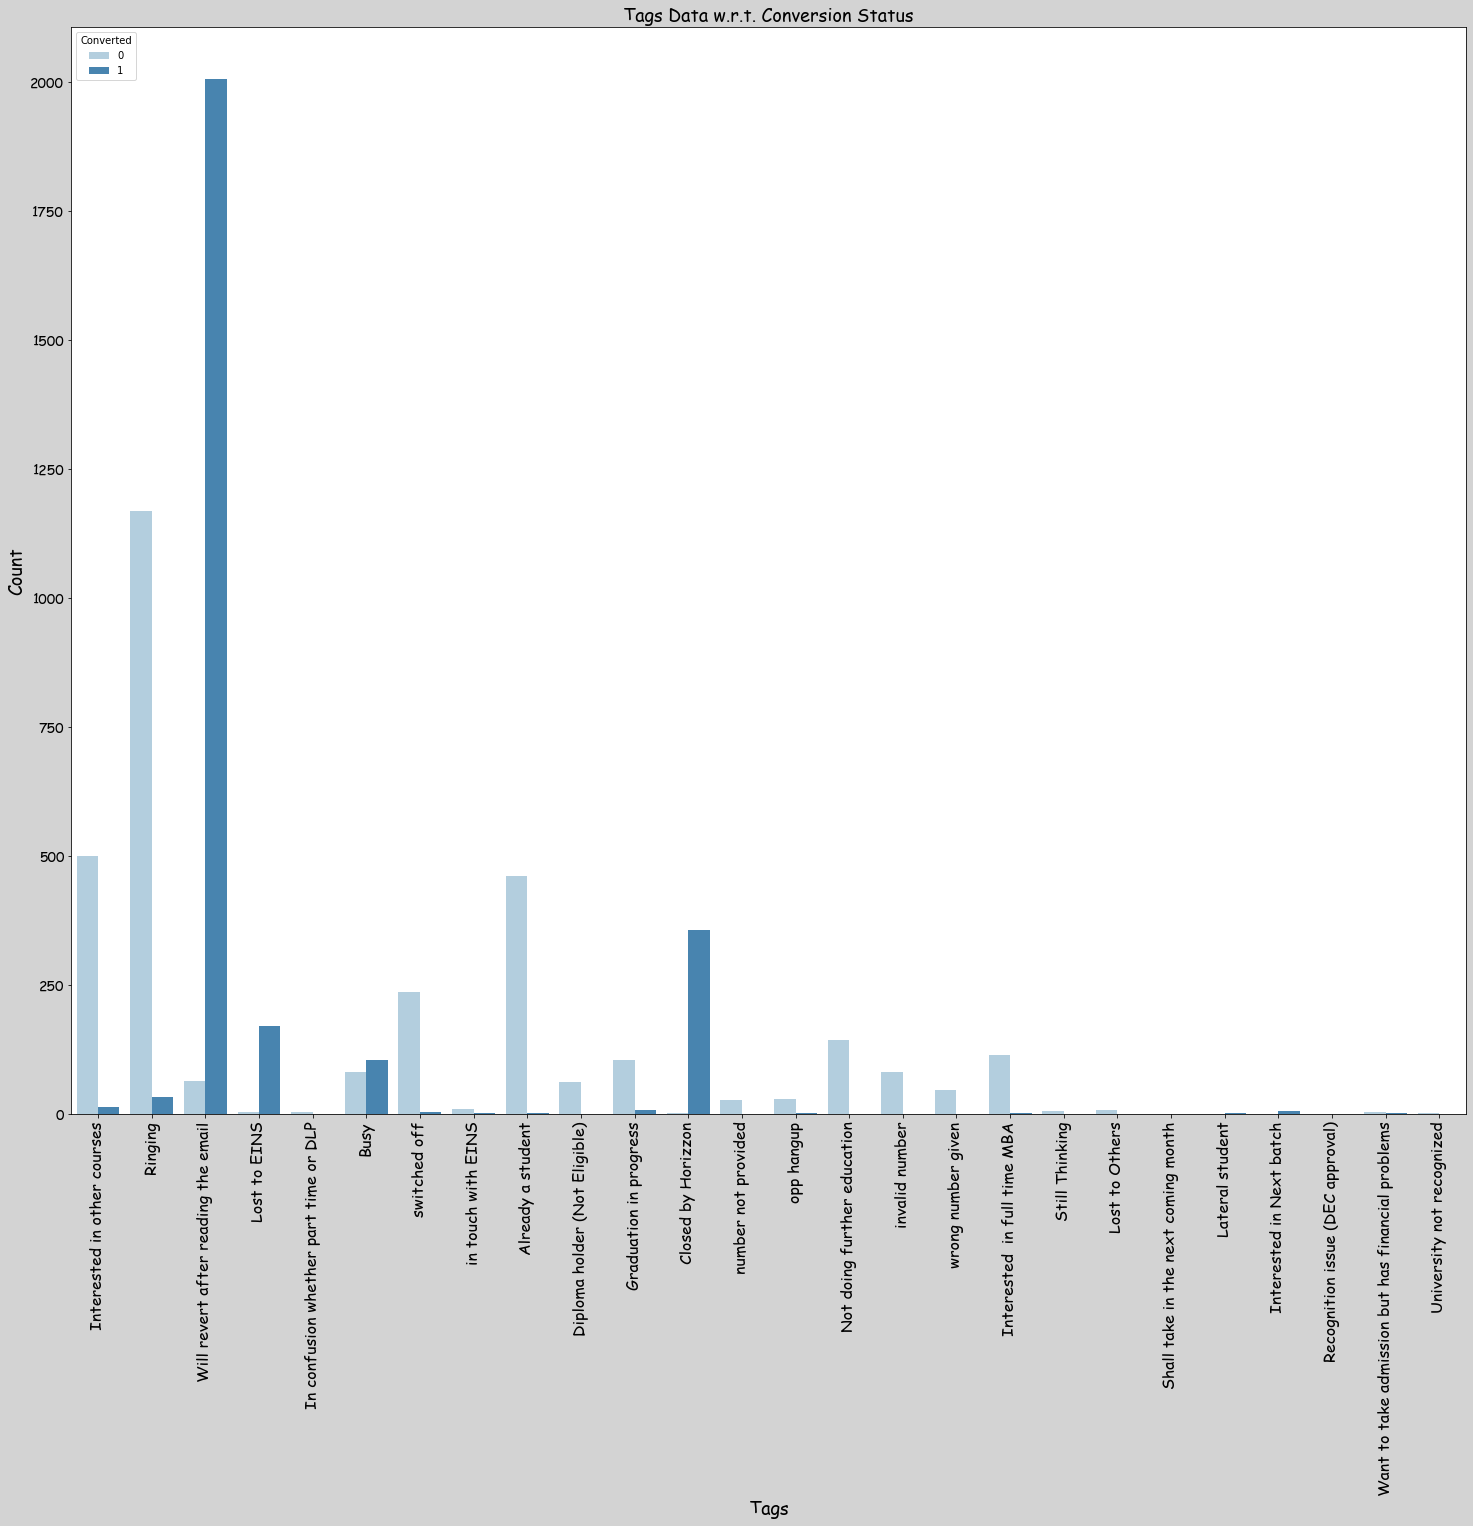

In [217]:
# Plotting spread of Tags columnn 
fig = plt.figure(figsize=(25,20))
fig.set_facecolor("lightgrey")
sns.countplot(lead_score_data.Tags,palette='Blues', hue=lead_score_data.Converted)
plt.xticks(rotation = 90,fontsize=16,family="Comic Sans MS")
plt.yticks(fontsize=14,family="Comic Sans MS")
plt.ylabel("Count", fontsize=18,family = "Comic Sans MS")
plt.xlabel("Tags", fontsize=18,family = "Comic Sans MS")
plt.title("Tags Data w.r.t. Conversion Status", fontsize=18,family = "Comic Sans MS")
plt.show()

# Inference
- Nan in the **'Tags'** column can be imputed by **'Will revert after reading the email'.**

In [218]:
# Tags column can be imputed by 'Will revert after reading the email'.
lead_score_data['Tags'] = lead_score_data['Tags'].replace(np.nan, 'Will revert after reading the email')

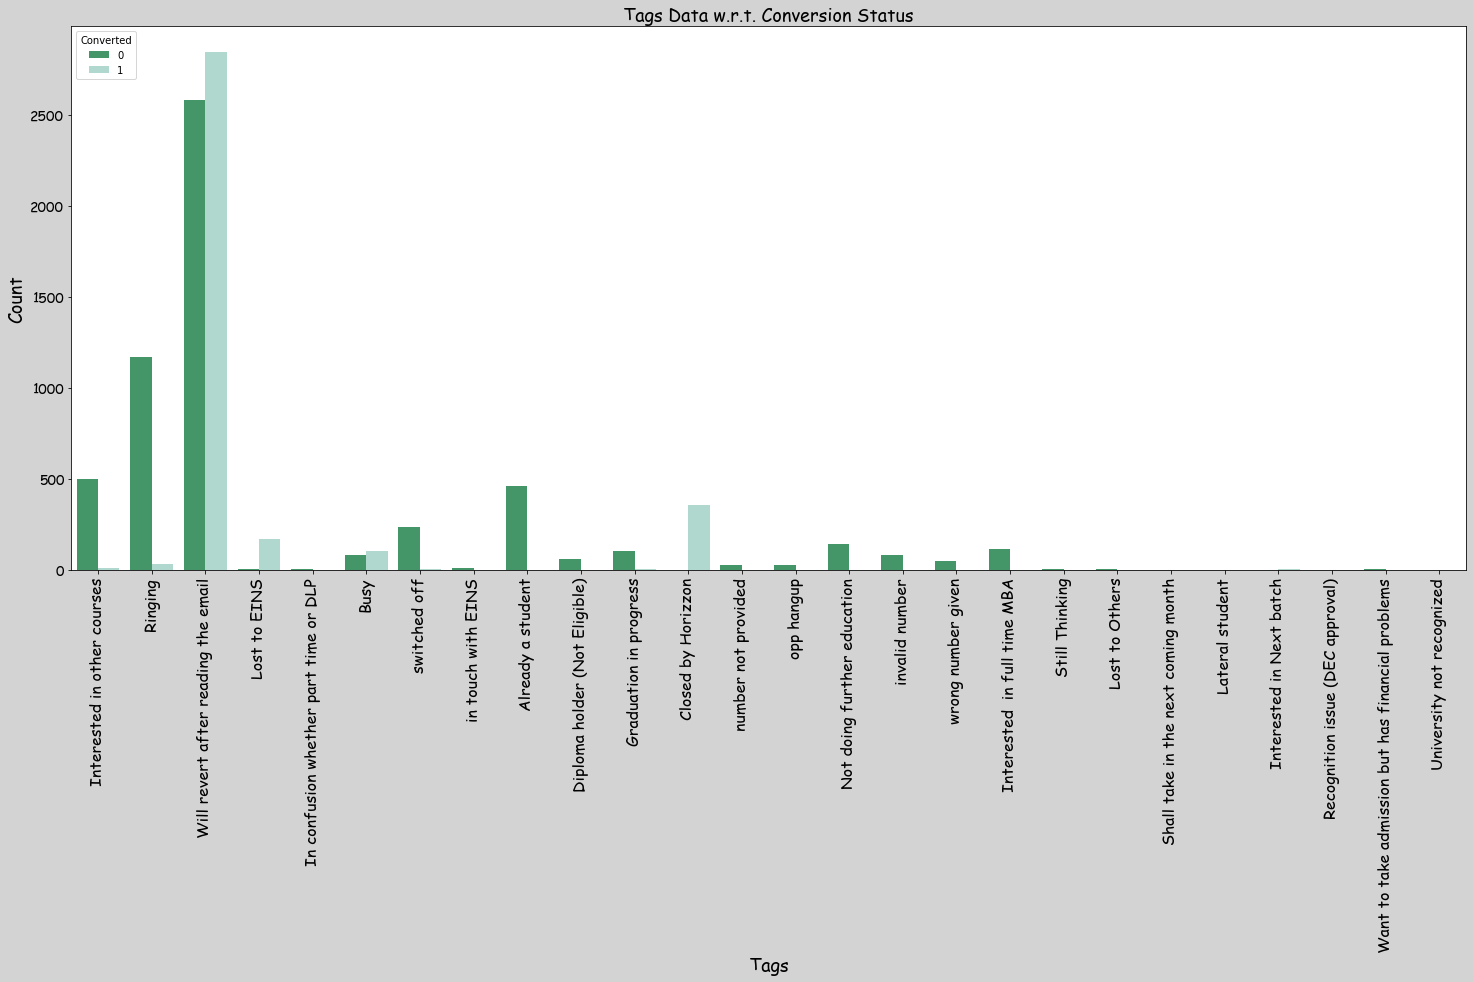

In [219]:
# Plotting spread of Tags columnn 
fig = plt.figure(figsize=(25,10))
fig.set_facecolor("lightgrey")
sns.countplot(lead_score_data.Tags,palette='BuGn_r', hue=lead_score_data.Converted)
plt.xticks(rotation = 90,fontsize=16,family="Comic Sans MS")
plt.yticks(fontsize=14,family="Comic Sans MS")
plt.ylabel("Count", fontsize=18,family = "Comic Sans MS")
plt.xlabel("Tags", fontsize=18,family = "Comic Sans MS")
plt.title("Tags Data w.r.t. Conversion Status", fontsize=18,family = "Comic Sans MS")
plt.show()

## Country

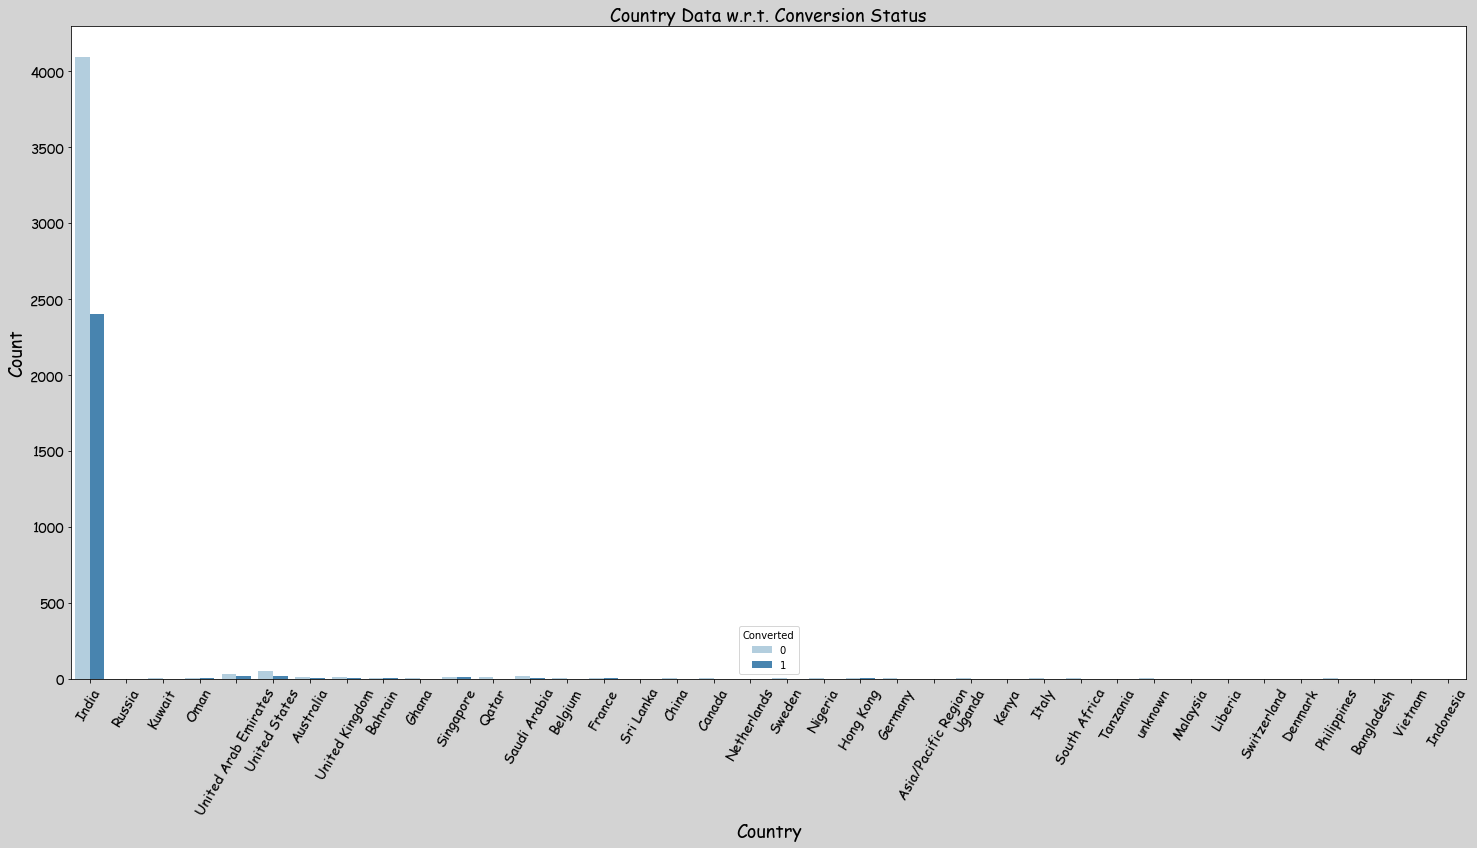

In [220]:
# Plotting spread of Country columnn 
fig=plt.figure(figsize=(25,12))
fig.set_facecolor("lightgrey")
sns.countplot(lead_score_data.Country,palette='Blues', hue=lead_score_data.Converted)
plt.xticks(rotation = 60,fontsize=14,family="Comic Sans MS")
plt.yticks(fontsize=14,family="Comic Sans MS")
plt.ylabel("Count", fontsize=18,family = "Comic Sans MS")
plt.xlabel("Country", fontsize=18,family = "Comic Sans MS")
plt.title("Country Data w.r.t. Conversion Status", fontsize=18,family = "Comic Sans MS")
plt.show()

# Inference
- 95% of the data has country as India hence imputing with India
- Based on above graph we can see various Countries which have limited leads only, thus combining all those to one category 'Outside India'

In [221]:
# Country is India for most values so let's impute the same in missing values.
lead_score_data['Country'] = lead_score_data['Country'].replace(np.nan, 'India')

In [222]:
lead_score_data['Country'] = lead_score_data['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')
lead_score_data['Country'].value_counts()

India            8953
Outside India     287
Name: Country, dtype: int64

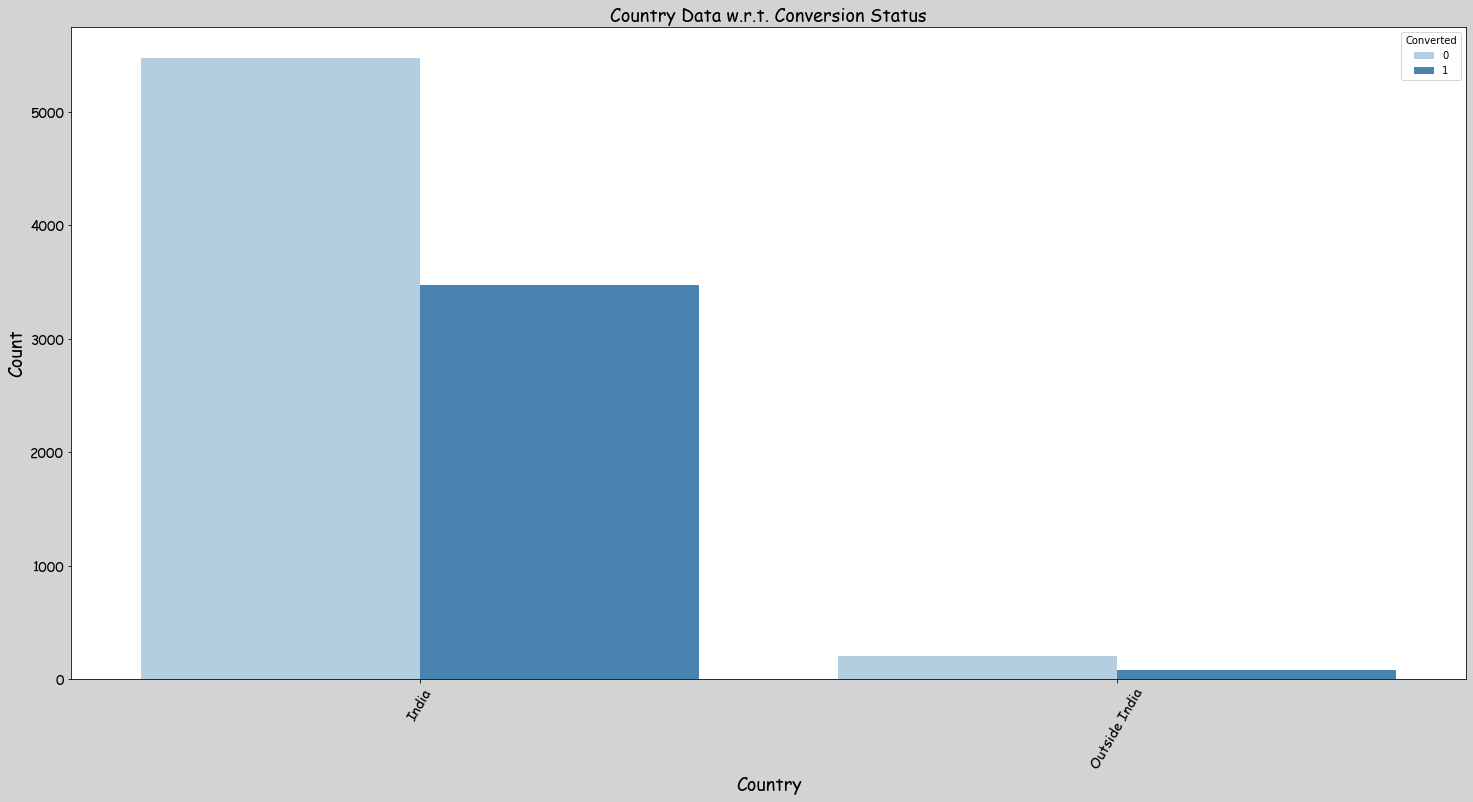

In [223]:
# Plotting spread of Country columnn 
fig=plt.figure(figsize=(25,12))
fig.set_facecolor("lightgrey")
sns.countplot(lead_score_data.Country,palette='Blues', hue=lead_score_data.Converted)
plt.xticks(rotation = 60,fontsize=14,family="Comic Sans MS")
plt.yticks(fontsize=14,family="Comic Sans MS")
plt.ylabel("Count", fontsize=18,family = "Comic Sans MS")
plt.xlabel("Country", fontsize=18,family = "Comic Sans MS")
plt.title("Country Data w.r.t. Conversion Status", fontsize=18,family = "Comic Sans MS")
plt.show()

# Current Occupation

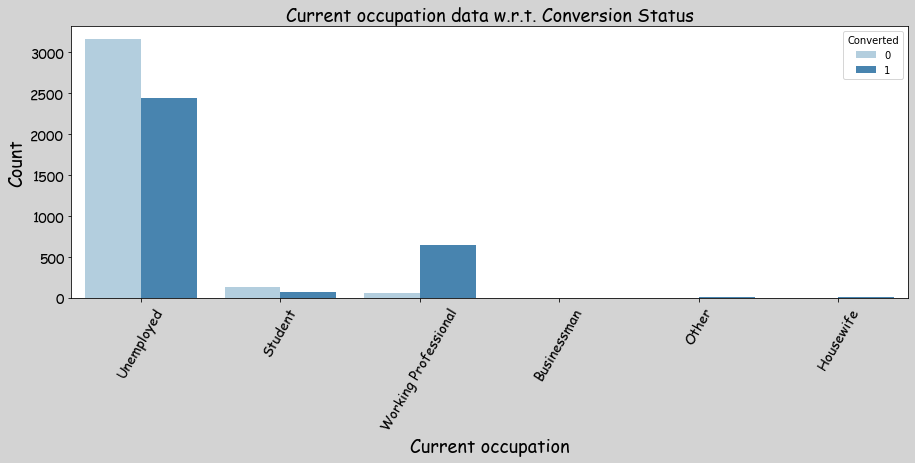

In [224]:
# Plotting spread of Current Occupation columnn 
fig = plt.figure(figsize=(15,5))
fig.set_facecolor("lightgrey")
sns.countplot(lead_score_data['What is your current occupation'],palette='Blues', hue=lead_score_data.Converted)
plt.xticks(rotation = 60,fontsize=14,family="Comic Sans MS")
plt.yticks(fontsize=14,family="Comic Sans MS")
plt.ylabel("Count", fontsize=18,family = "Comic Sans MS")
plt.xlabel("Current occupation", fontsize=18,family = "Comic Sans MS")
plt.title("Current occupation data w.r.t. Conversion Status", fontsize=18,family = "Comic Sans MS")
plt.show()

In [225]:
# Country is India for most values so let's impute the same in missing values.
lead_score_data['What is your current occupation'] = lead_score_data['What is your current occupation'].replace(np.nan, 'Unemployed')
lead_score_data['What is your current occupation'] = lead_score_data['What is your current occupation'].replace(['Other'], 'Other_Occupation')

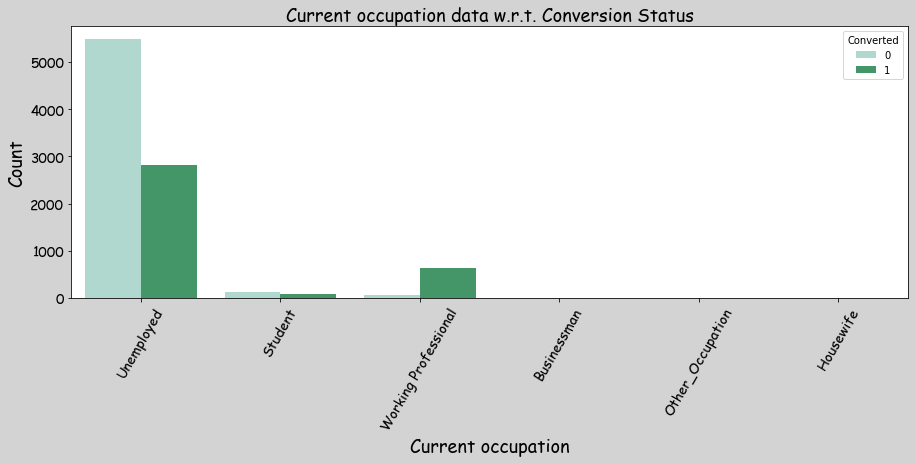

In [226]:
# Plotting spread of Current Occupation columnn 
fig = plt.figure(figsize=(15,5))
fig.set_facecolor("lightgrey")
sns.countplot(lead_score_data['What is your current occupation'],palette='BuGn', hue=lead_score_data.Converted)
plt.xticks(rotation = 60,fontsize=14,family="Comic Sans MS")
plt.yticks(fontsize=14,family="Comic Sans MS")
plt.ylabel("Count", fontsize=18,family = "Comic Sans MS")
plt.xlabel("Current occupation", fontsize=18,family = "Comic Sans MS")
plt.title("Current occupation data w.r.t. Conversion Status", fontsize=18,family = "Comic Sans MS")
plt.show()

# Inference
- Working Professionals going for the course have high chances of joining it.
- Unemployed leads are the most in terms of Absolute numbers but has around 30-35% conversion rate

## What matters most to you in choosing a course

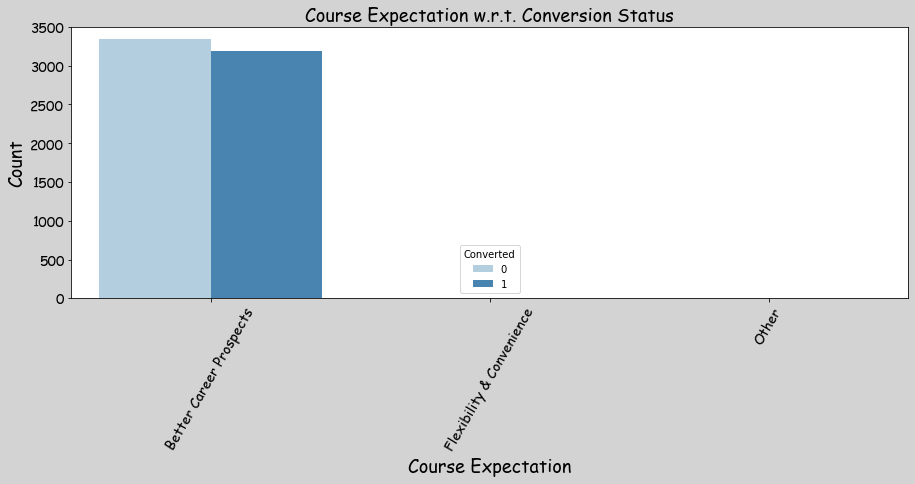

In [227]:
# Plotting spread of "What matters most to you in choosing a course" columnn 
fig = plt.figure(figsize=(15,5))
fig.set_facecolor("lightgrey")
sns.countplot(lead_score_data['What matters most to you in choosing a course'],palette='Blues', hue=lead_score_data.Converted)
plt.xticks(rotation = 60,fontsize=14,family="Comic Sans MS")
plt.yticks(fontsize=14,family="Comic Sans MS")
plt.ylabel("Count", fontsize=18,family = "Comic Sans MS")
plt.xlabel("Course Expectation", fontsize=18,family = "Comic Sans MS")
plt.title("Course Expectation w.r.t. Conversion Status", fontsize=18,family = "Comic Sans MS")
plt.show()

In [228]:
# Country is India for most values so let's impute the same in missing values.
lead_score_data['What matters most to you in choosing a course'] = lead_score_data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [229]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
lead_score_data = lead_score_data.dropna()

## Checking percentage of Null Values

In [230]:
#Identifying Missing data
total_null = lead_score_data.isnull().sum().sort_values(ascending = False)
percent = ((lead_score_data.isnull().sum()/lead_score_data.isnull().count())*100).sort_values(ascending = False)
print("Total records (lead Score Data) = ", lead_score_data.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(5)

Total records (lead Score Data) =  9074


,Total Missing,In Percent
Last Notable Activity,0,0.00
A free copy of Mastering The Interview,0,0.00
Lead Source,0,0.00
Do Not Email,0,0.00
Do Not Call,0,0.00


# EDA
- Univariate Analysis

## Conversion Rate

In [231]:
Conversion_rate = (sum(lead_score_data['Converted'])/len(lead_score_data['Converted'].index))*100
print("The conversion rate of leads is: ",Conversion_rate)

The conversion rate of leads is:  37.85541106458012


## Lead Source

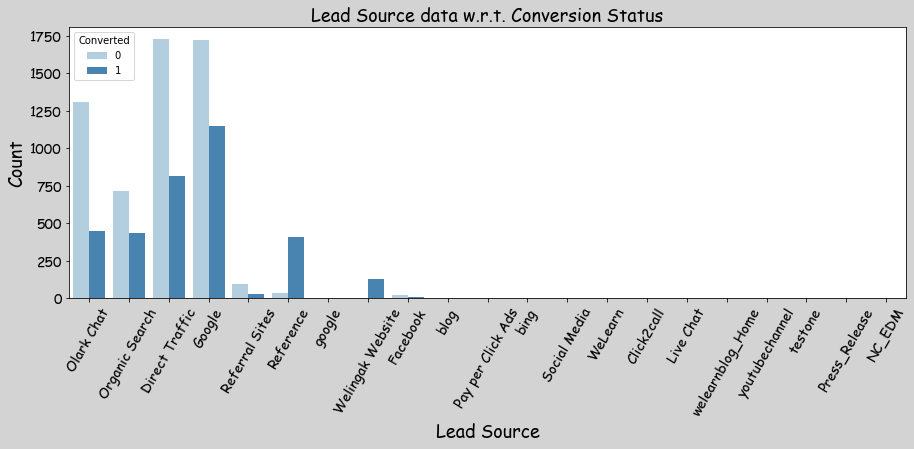

In [232]:
# Plotting spread of Lead Source columnn 
fig = plt.figure(figsize=(15,5))
fig.set_facecolor("lightgrey")
sns.countplot(lead_score_data['Lead Source'],palette='Blues', hue=lead_score_data.Converted)
plt.xticks(rotation = 60,fontsize=14,family="Comic Sans MS")
plt.yticks(fontsize=14,family="Comic Sans MS")
plt.ylabel("Count", fontsize=18,family = "Comic Sans MS")
plt.xlabel('Lead Source', fontsize=18,family = "Comic Sans MS")
plt.title("Lead Source data w.r.t. Conversion Status", fontsize=18,family = "Comic Sans MS")
plt.show()

## Inference
- Based on above graph we can see various lead source which have just 1 or 2 leads only, thus combining all those to one category **'Misc_Lead_Source'**
- There are two categories "Google" & 'google' which are same only. Correcttion in the data required.


In [233]:
# Spell Correction
lead_score_data['Lead Source'] = lead_score_data['Lead Source'].replace('google',"Google")

In [234]:
lead_score_data['Lead Source'] = lead_score_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 
    'Pay per Click Ads', 'Press_Release','Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home',
    'youtubechannel'], 'Misc_Lead_Source')

## After merging the Categories below graph shown

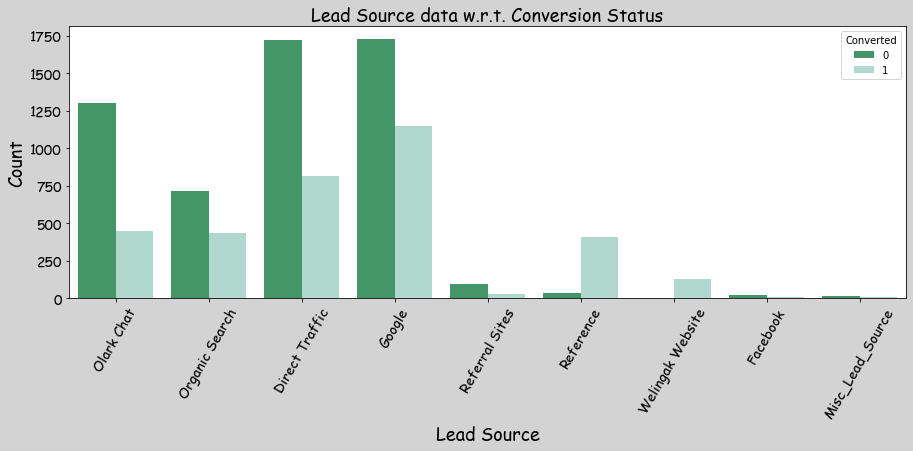

In [235]:
# Plotting spread of Lead Source columnn 
fig = plt.figure(figsize=(15,5))
fig.set_facecolor("lightgrey")
sns.countplot(lead_score_data['Lead Source'],palette='BuGn_r', hue=lead_score_data.Converted)
plt.xticks(rotation = 60,fontsize=14,family="Comic Sans MS")
plt.yticks(fontsize=14,family="Comic Sans MS")
plt.ylabel("Count", fontsize=18,family = "Comic Sans MS")
plt.xlabel('Lead Source', fontsize=18,family = "Comic Sans MS")
plt.title("Lead Source data w.r.t. Conversion Status", fontsize=18,family = "Comic Sans MS")
plt.show()

## Lead Origin

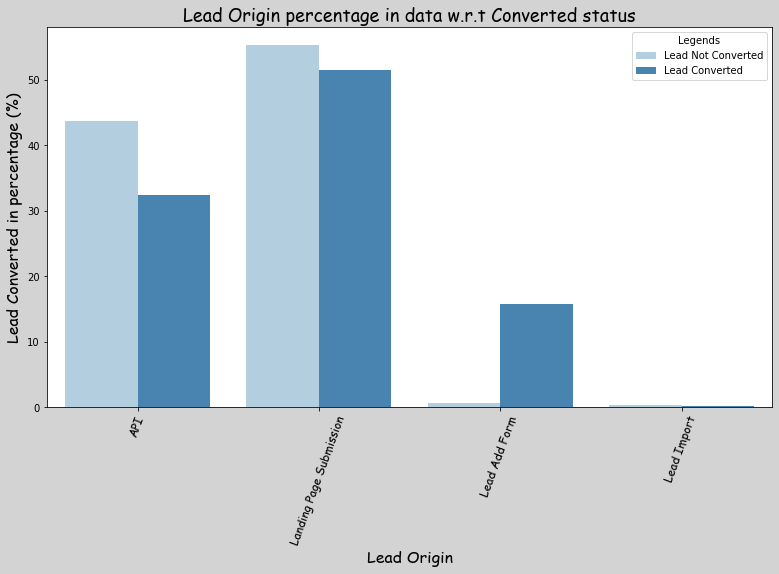

In [236]:
fig = plt.figure(figsize=(13,7))
fig.set_facecolor("lightgrey")
lead_conv = lead_score_data[lead_score_data["Converted"]==1]["Lead Origin"].value_counts().reset_index()
lead_conv = lead_conv.sort_values(by = "index",ascending=True)
lead_conv["percentage"]  = (lead_conv["Lead Origin"]*100/lead_conv["Lead Origin"].sum())
lead_conv["Legends"]        = "Lead Converted"

lead_non_conv = lead_score_data[lead_score_data["Converted"]==0]["Lead Origin"].value_counts().reset_index()
lead_non_conv = lead_non_conv.sort_values(by = "index",ascending=True)
lead_non_conv["percentage"] = (lead_non_conv["Lead Origin"]*100/lead_non_conv["Lead Origin"].sum())
lead_non_conv["Legends"]       = "Lead Not Converted"

lead_status_origin = pd.concat([lead_non_conv,lead_conv],axis=0)

ax = sns.barplot("index","percentage",data=lead_status_origin,hue="Legends",palette="Blues")
plt.xticks(rotation = 70,fontsize=12,family="Comic Sans MS")
plt.xlabel("Lead Origin",fontsize=16,family = "Comic Sans MS")
plt.ylabel("Lead Converted in percentage (%)",fontsize=16,family = "Comic Sans MS")
plt.title("Lead Origin percentage in data w.r.t Converted status",fontsize=18,family = "Comic Sans MS")
plt.show()

## Inference
- **API Submission** have 30-35% conversion rate
- **Landing Page** Submission have 45-50% conversion rate 
- Count of lead originated from **'API & Landing Page'** are considerable.
- Lead Add Form has more than 90% conversion rate but count of lead are not very high.
- Lead Import are very less in count.

To improve overall lead conversion rate, we need to focus more on **improving lead converion of API and Landing Page Submission origin** and **generate more leads from Lead Add Form.**


## Donot Call or Donot Email

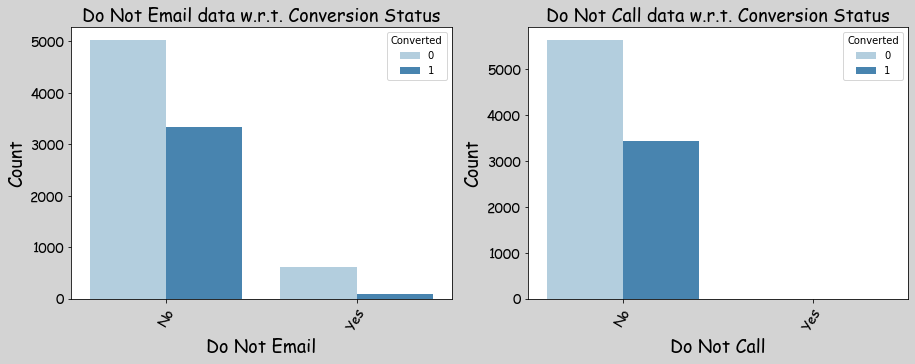

In [237]:
# Plotting "Do not Call" or "Do not Email" feature columnn 
fig = plt.figure(figsize=(15,5))
fig.set_facecolor("lightgrey")

plt.subplot(1,2,1)
sns.countplot(lead_score_data['Do Not Email'],palette='Blues', hue=lead_score_data.Converted)
plt.xticks(rotation = 60,fontsize=14,family="Comic Sans MS")
plt.yticks(fontsize=14,family="Comic Sans MS")
plt.ylabel("Count", fontsize=18,family = "Comic Sans MS")
plt.xlabel('Do Not Email', fontsize=18,family = "Comic Sans MS")
plt.title("Do Not Email data w.r.t. Conversion Status", fontsize=18,family = "Comic Sans MS")

plt.subplot(1,2,2)
sns.countplot(lead_score_data['Do Not Call'],palette='Blues', hue=lead_score_data.Converted)
plt.xticks(rotation = 60,fontsize=14,family="Comic Sans MS")
plt.yticks(fontsize=14,family="Comic Sans MS")
plt.ylabel("Count", fontsize=18,family = "Comic Sans MS")
plt.xlabel('Do Not Call', fontsize=18,family = "Comic Sans MS")
plt.title("Do Not Call data w.r.t. Conversion Status", fontsize=18,family = "Comic Sans MS")

plt.show()

## Inference
- All the values are no except 2 values, hence there is no variance, doesnt indicate anything about leads and can easily be dropped

In [238]:
lead_score_data.drop(["Do Not Call"], 1, inplace = True)

## Tags

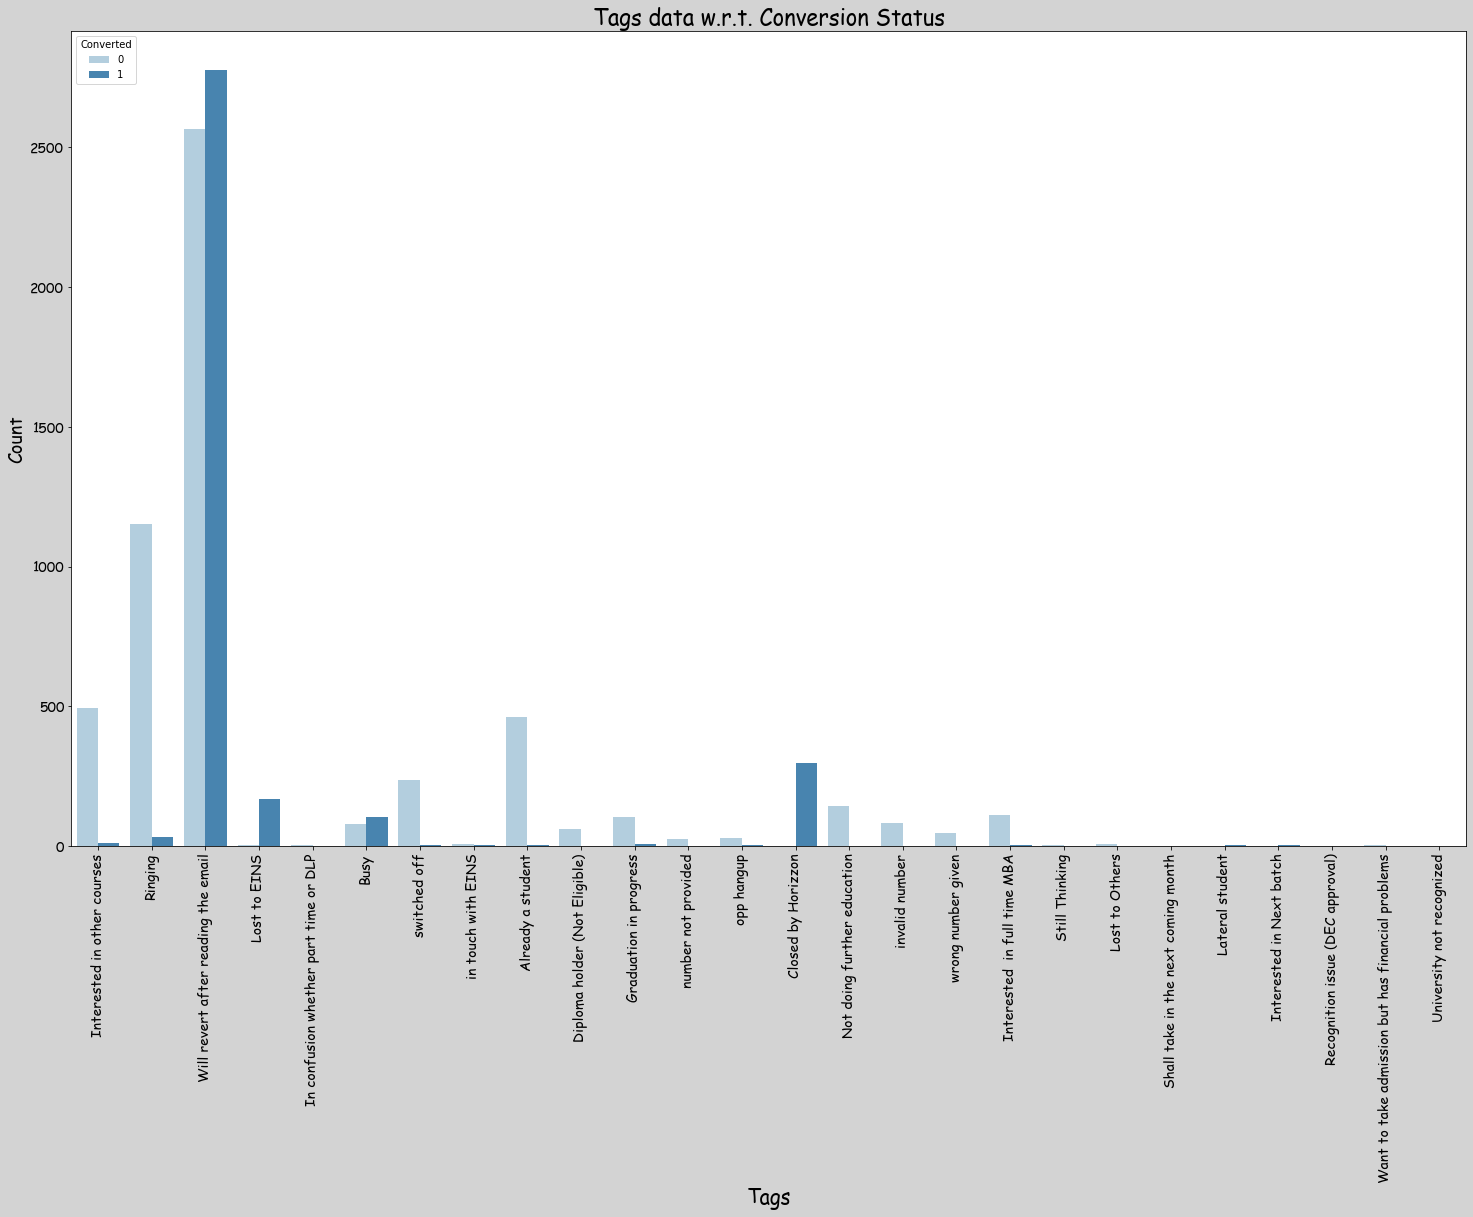

In [239]:
# Plotting "Tags" feature columnn 
fig = plt.figure(figsize=(25,15))
fig.set_facecolor("lightgrey")

plt.subplot(1,1,1)
sns.countplot(lead_score_data['Tags'],palette='Blues', hue=lead_score_data.Converted)
plt.xticks(rotation = 90,fontsize=14,family="Comic Sans MS")
plt.yticks(fontsize=14,family="Comic Sans MS")
plt.ylabel("Count", fontsize=18,family = "Comic Sans MS")
plt.xlabel('Tags', fontsize=20,family = "Comic Sans MS")
plt.title("Tags data w.r.t. Conversion Status", fontsize=22,family = "Comic Sans MS")

plt.show()

## Inference
- Based on above graph we can see various **"Tags"** which have just 1 or 2 leads only, thus combining all those to one category **'Misc_Tags'**

In [240]:
lead_score_data['Tags'] = lead_score_data['Tags'].replace(['In confusion whether part time or DLP', 
    'in touch with EINS','Diploma holder (Not Eligible)','Approached upfront','Graduation in progress','number not provided',
    'opp hangup','Still Thinking','Lost to Others','Shall take in the next coming month','Lateral student',
    'Interested in Next batch','Recognition issue (DEC approval)','Want to take admission but has financial problems',
    'University not recognized'], 'Misc_Tags')

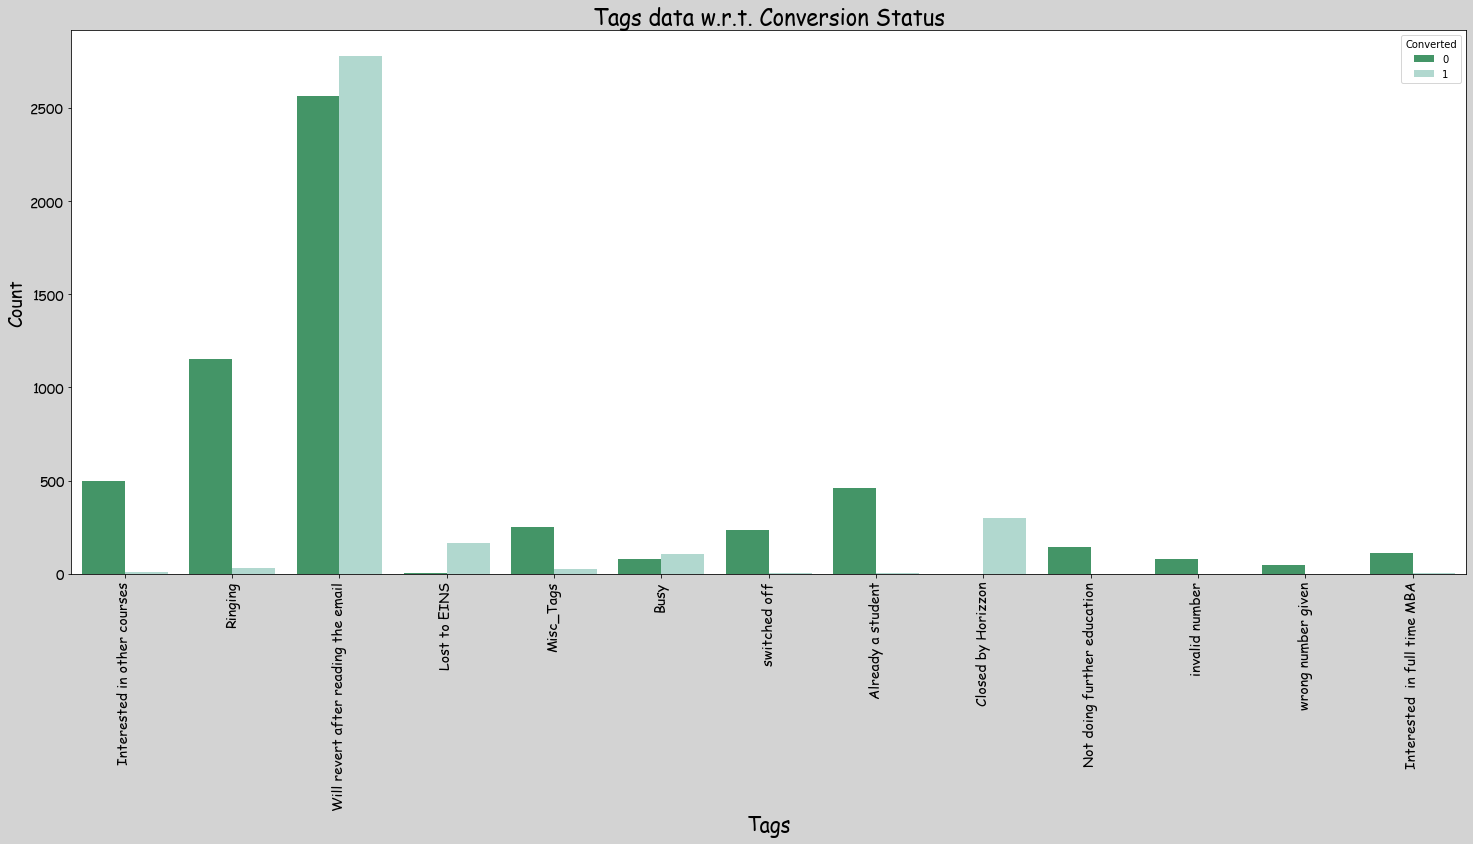

In [241]:
# Plotting "Tags" feature columnn 
fig = plt.figure(figsize=(25,10))
fig.set_facecolor("lightgrey")

plt.subplot(1,1,1)
sns.countplot(lead_score_data['Tags'],palette='BuGn_r', hue=lead_score_data.Converted)
plt.xticks(rotation = 90,fontsize=14,family="Comic Sans MS")
plt.yticks(fontsize=14,family="Comic Sans MS")
plt.ylabel("Count", fontsize=18,family = "Comic Sans MS")
plt.xlabel('Tags', fontsize=20,family = "Comic Sans MS")
plt.title("Tags data w.r.t. Conversion Status", fontsize=22,family = "Comic Sans MS")

plt.show()

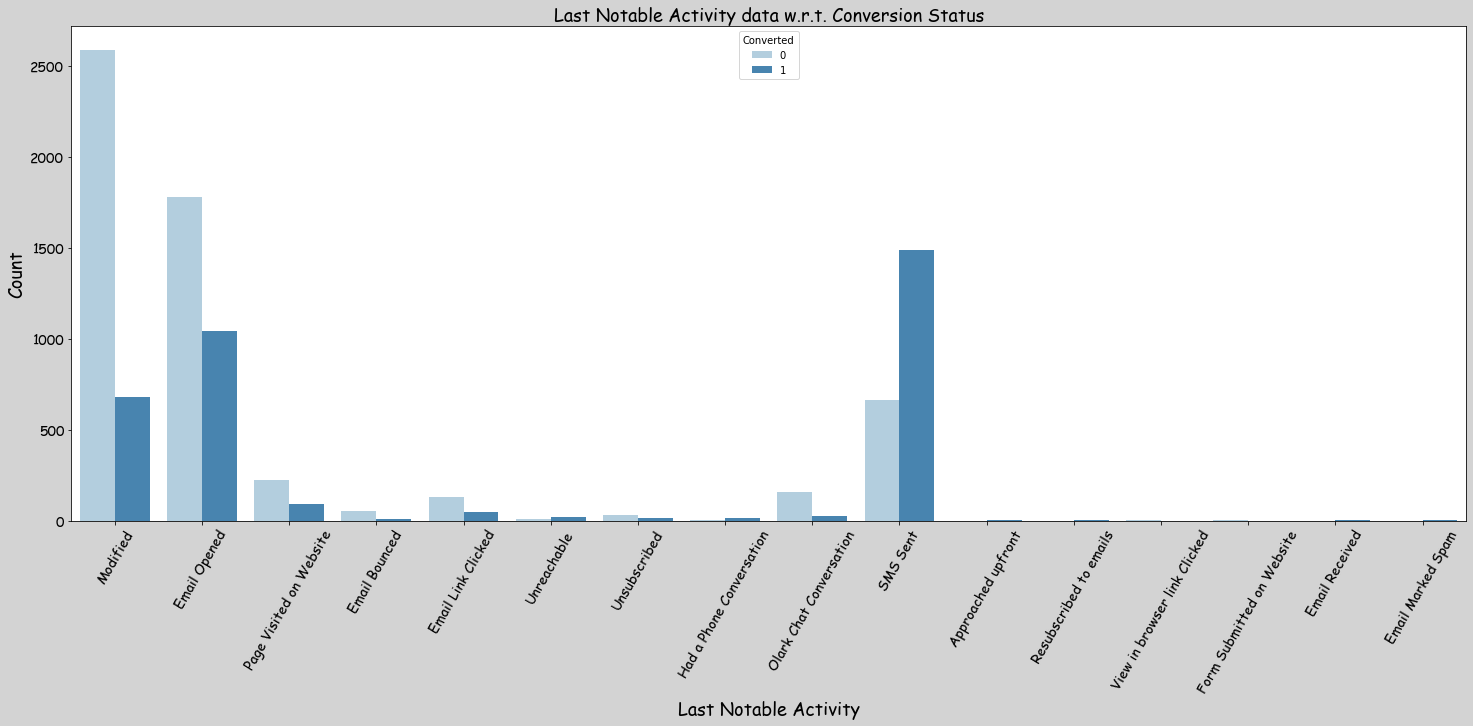

In [242]:
# Plotting "Last Notable Activity" feature columnn 
fig = plt.figure(figsize=(25,20))
fig.set_facecolor("lightgrey")

plt.subplot(2,1,1)
sns.countplot(lead_score_data['Last Notable Activity'],palette='Blues', hue=lead_score_data.Converted)
plt.xticks(rotation = 60,fontsize=14,family="Comic Sans MS")
plt.yticks(fontsize=14,family="Comic Sans MS")
plt.ylabel("Count", fontsize=18,family = "Comic Sans MS")
plt.xlabel('Last Notable Activity', fontsize=18,family = "Comic Sans MS")
plt.title("Last Notable Activity data w.r.t. Conversion Status", fontsize=18,family = "Comic Sans MS")

plt.show()

## Inference
- Based on above graph we can see various Last Notable activity which have just 1 or 2 leads only, thus combining all those to one category **'Misc_Notable_Activity'**

In [243]:
lead_score_data['Last Notable Activity'] = lead_score_data['Last Notable Activity'].replace(['Had a Phone Conversation',
        'Approached upfront','Resubscribed to emails', 'View in browser link Clicked',
        'Form Submitted on Website', 'Email Received', 'Email Marked Spam'], 'Misc_Notable_Activity')

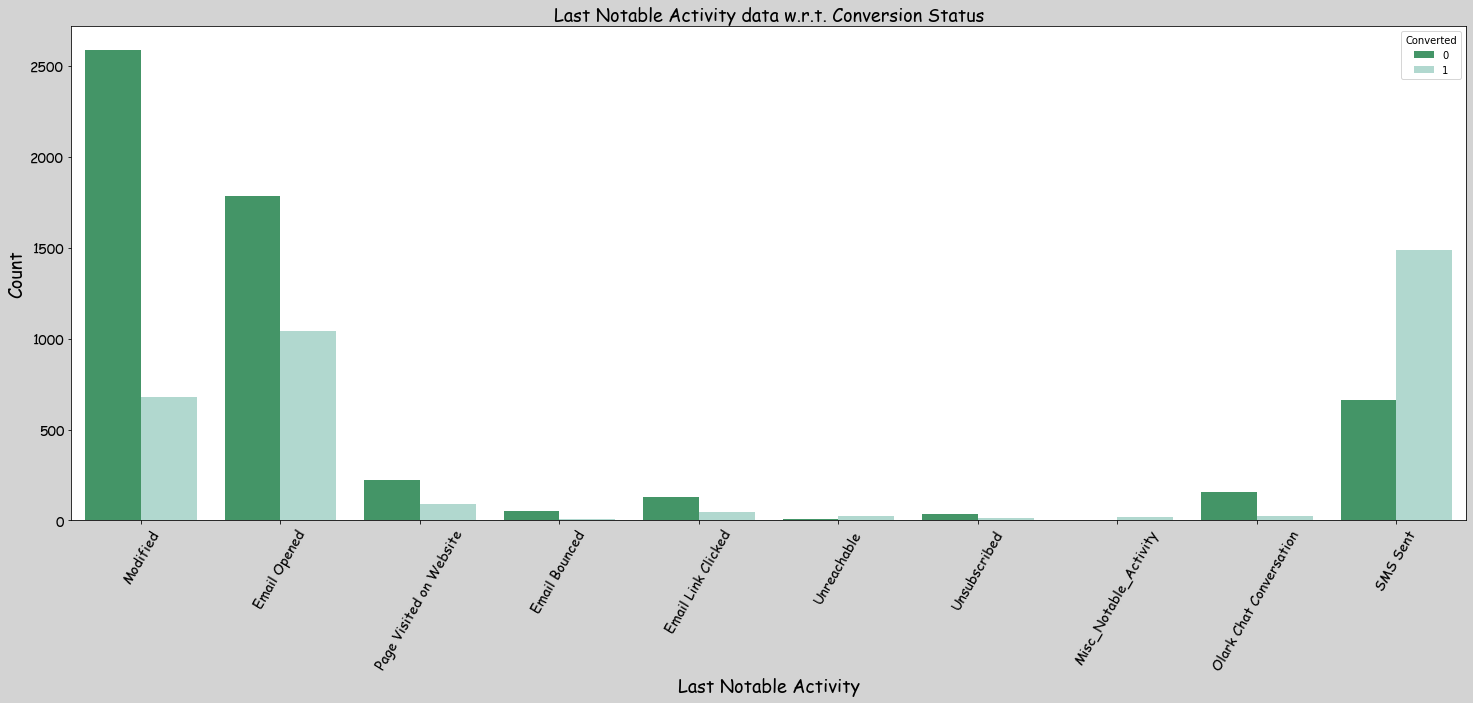

In [244]:
# Plotting "Last Notable Activity" feature columnn 
fig = plt.figure(figsize=(25,20))
fig.set_facecolor("lightgrey")

plt.subplot(2,1,1)
sns.countplot(lead_score_data['Last Notable Activity'],palette='BuGn_r', hue=lead_score_data.Converted)
plt.xticks(rotation = 60,fontsize=14,family="Comic Sans MS")
plt.yticks(fontsize=14,family="Comic Sans MS")
plt.ylabel("Count", fontsize=18,family = "Comic Sans MS")
plt.xlabel('Last Notable Activity', fontsize=18,family = "Comic Sans MS")
plt.title("Last Notable Activity data w.r.t. Conversion Status", fontsize=18,family = "Comic Sans MS")

plt.show()

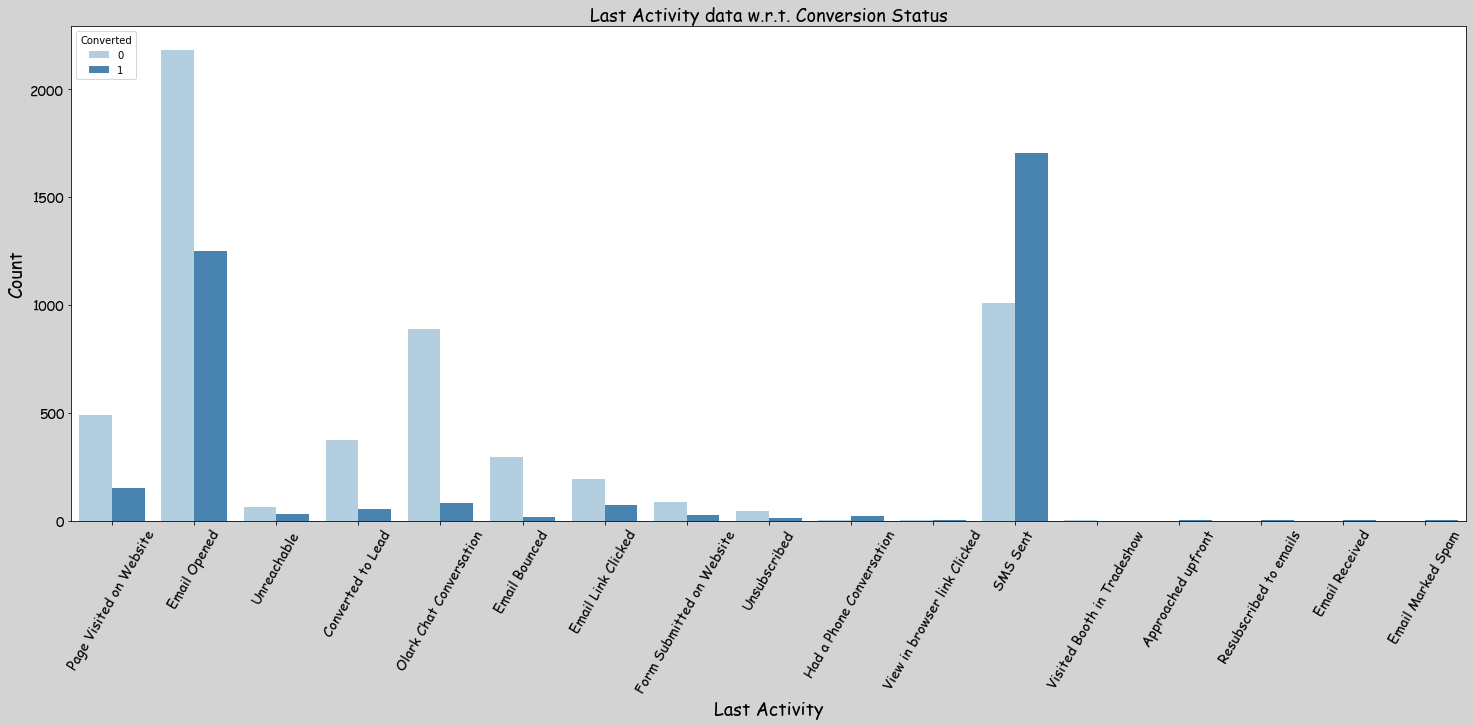

In [245]:
# Plotting "Last Activity" feature columnn 
fig = plt.figure(figsize=(25,20))
fig.set_facecolor("lightgrey")

plt.subplot(2,1,1)
sns.countplot(lead_score_data['Last Activity'],palette='Blues', hue=lead_score_data.Converted)
plt.xticks(rotation = 60,fontsize=14,family="Comic Sans MS")
plt.yticks(fontsize=14,family="Comic Sans MS")
plt.ylabel("Count", fontsize=18,family = "Comic Sans MS")
plt.xlabel('Last Activity', fontsize=18,family = "Comic Sans MS")
plt.title("Last Activity data w.r.t. Conversion Status", fontsize=18,family = "Comic Sans MS")

plt.show()

## Inference
- Based on above graph we can see various Last activity which have just 1 or 2 leads only, thus combining all those to one category **'Misc_Activity'**

In [246]:
lead_score_data['Last Activity'] = lead_score_data['Last Activity'].replace(['Had a Phone Conversation', 
          'View in browser link Clicked', 'Visited Booth in Tradeshow', 'Approached upfront',
           'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Misc_Last_Avtivity')

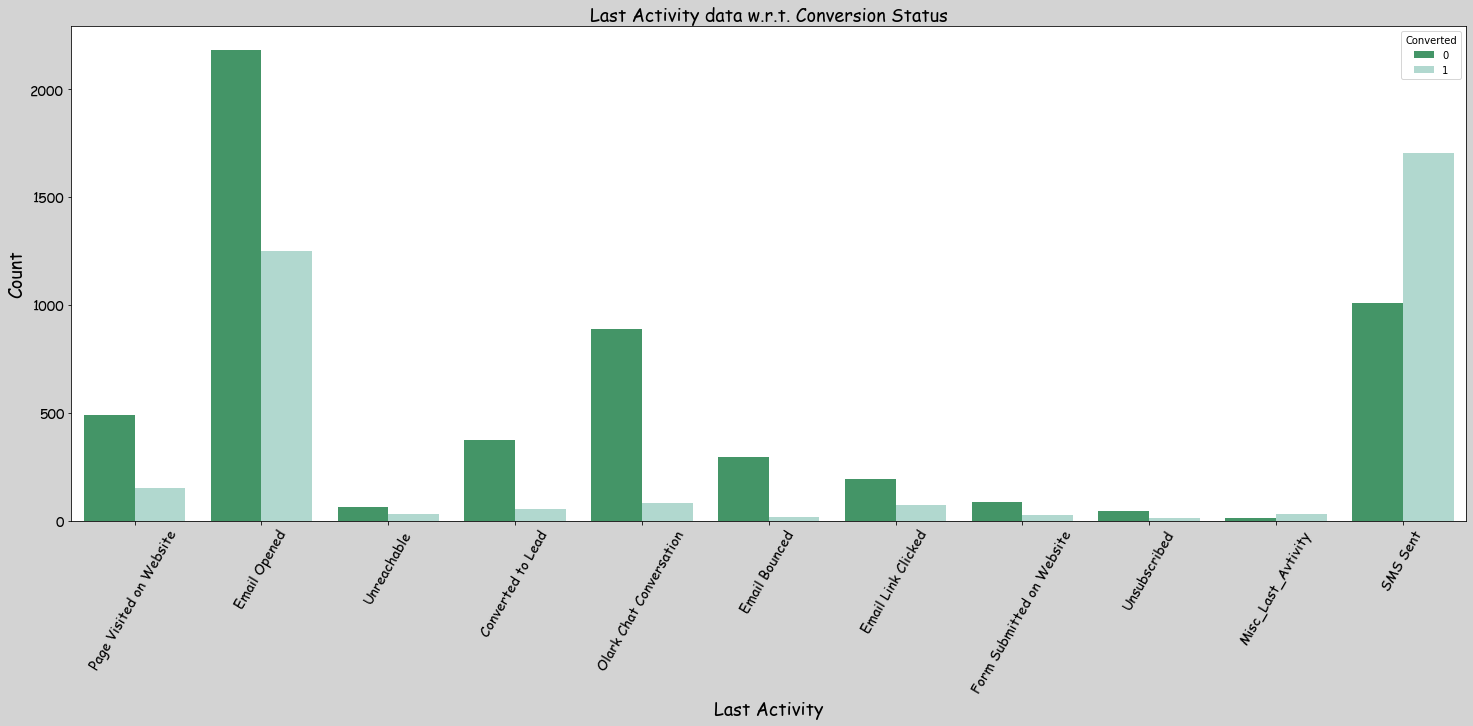

In [247]:
# Plotting "Last Activity" feature columnn 
fig = plt.figure(figsize=(25,20))
fig.set_facecolor("lightgrey")

plt.subplot(2,1,1)
sns.countplot(lead_score_data['Last Activity'],palette='BuGn_r', hue=lead_score_data.Converted)
plt.xticks(rotation = 60,fontsize=14,family="Comic Sans MS")
plt.yticks(fontsize=14,family="Comic Sans MS")
plt.ylabel("Count", fontsize=18,family = "Comic Sans MS")
plt.xlabel('Last Activity', fontsize=18,family = "Comic Sans MS")
plt.title("Last Activity data w.r.t. Conversion Status", fontsize=18,family = "Comic Sans MS")

plt.show()

## Checking some other values
- 'What matters most to you in choosing a course'
- 'Search'
- 'Newspaper Article'
- 'X Education Forums'
- 'Newspaper'
- 'Digital Advertisement'
- 'Through Recommendations'


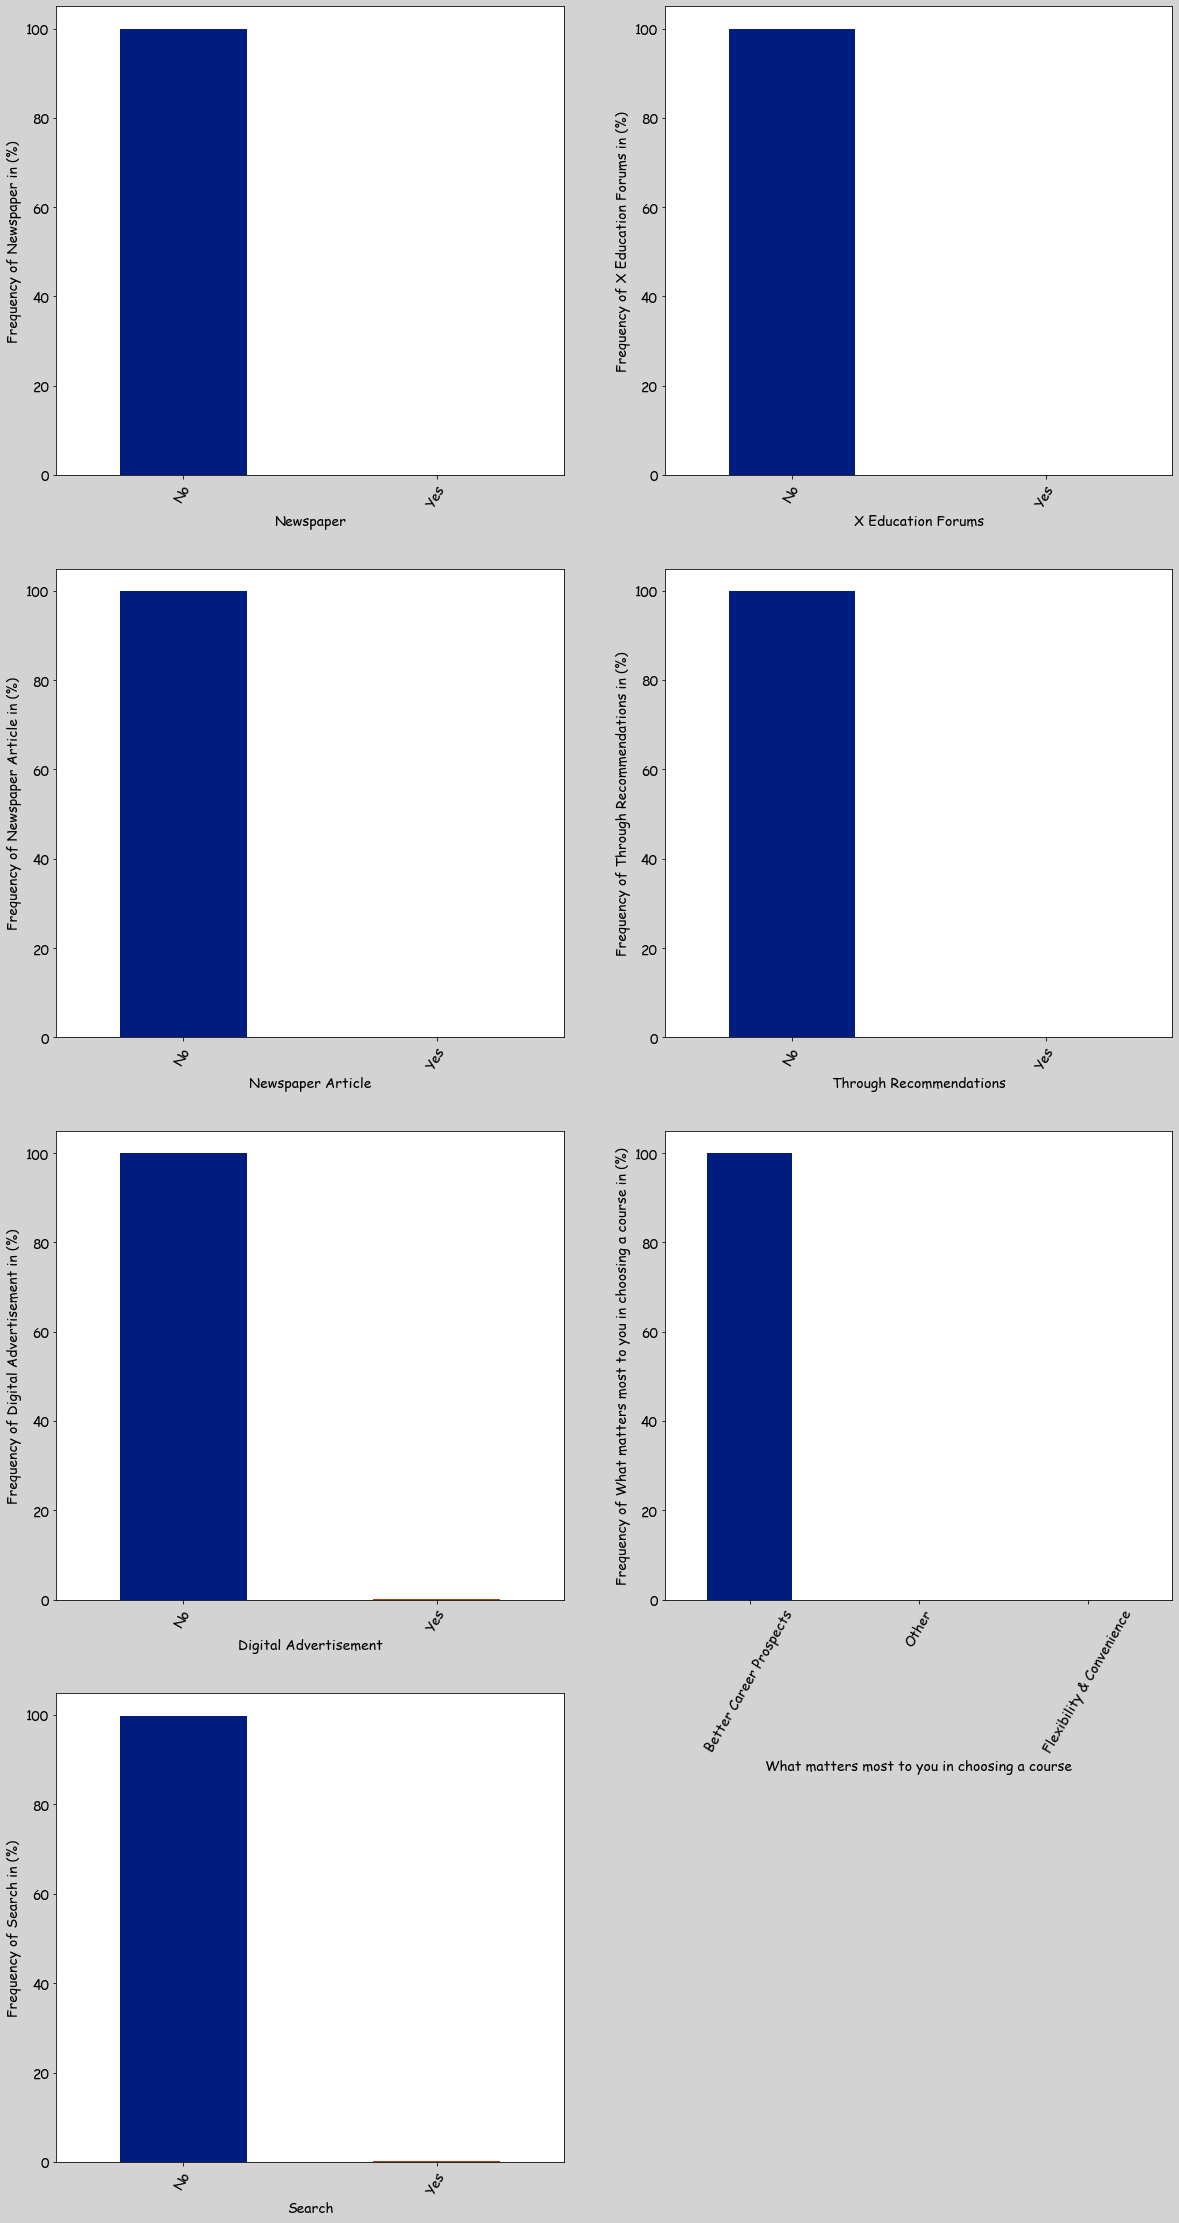

In [248]:
colnames = ["Newspaper","X Education Forums","Newspaper Article","Through Recommendations","Digital Advertisement",
        "What matters most to you in choosing a course","Search"]
bar_plot_percentage(lead_score_data,colnames)

## Inference
- **Newspaper, X Education Forums , Newspaper Articles, Through Recommendations & Digital Advertisements**
    - for all above features most of values are no hence it does not have any significant role in lead score, drop this column

- **What matters most to you in choosing a course** - 99.9% of available values are "Better career prospects" and around 30 % are missing, hence it does not have any significant role in lead score, drop this column
- **Search** - 99% values are no except a few yes and missing, hence it does not have any significant role in lead score, drop this column

In [249]:
lead_score_data.drop(["Newspaper","X Education Forums","Newspaper Article","Through Recommendations","Digital Advertisement",
        "What matters most to you in choosing a course","Search"], 1, inplace = True)

In [250]:
lead_score_data.shape

(9074, 16)

## Outliers Cleanup for Numerical variables

In [251]:
# Function for outliers detection
def outliers_graphs(df,colnames) :
    for colname in colnames:
        fig = plt.figure(figsize=(30, 50))
        fig.set_facecolor("lightgrey")
        plt.subplot(4,2,1)
        sns.boxplot(y =colname,x = 'Converted',data=lead_score_data)
        str1 = colname + " :- Boxplot for outliers detection"
        plt.title(str1, fontsize=18,family = "Comic Sans MS")
        plt.xlabel(colname, fontsize=14,family = "Comic Sans MS")
        
        plt.subplot(4,2,2)
        sns.distplot(lead_score_data[str(colname)])
        str2 = colname + " :- Distribution plot for skewness"
        plt.title(str2, fontsize=18,family = "Comic Sans MS")
        plt.xlabel(colname, fontsize=14,family = "Comic Sans MS")
        
   

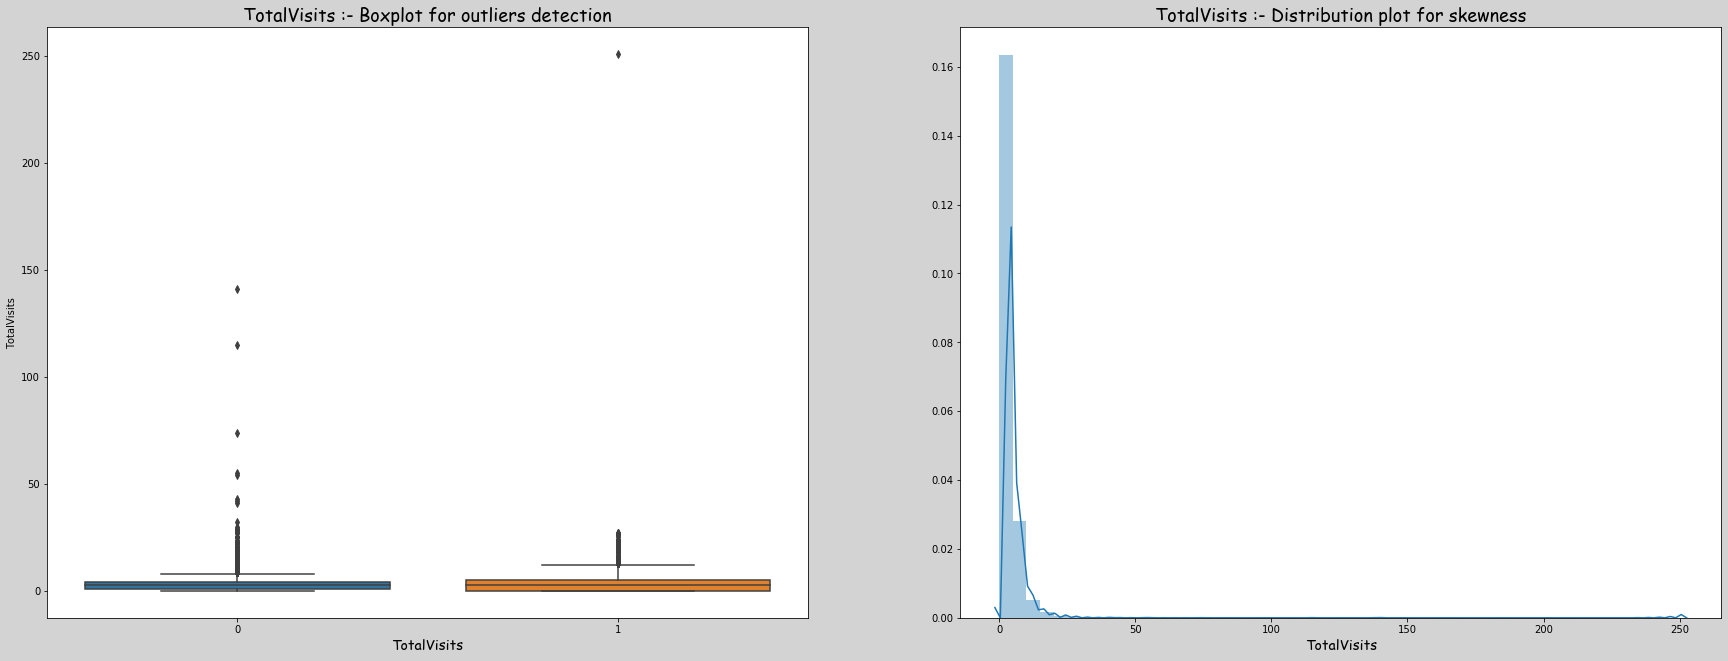

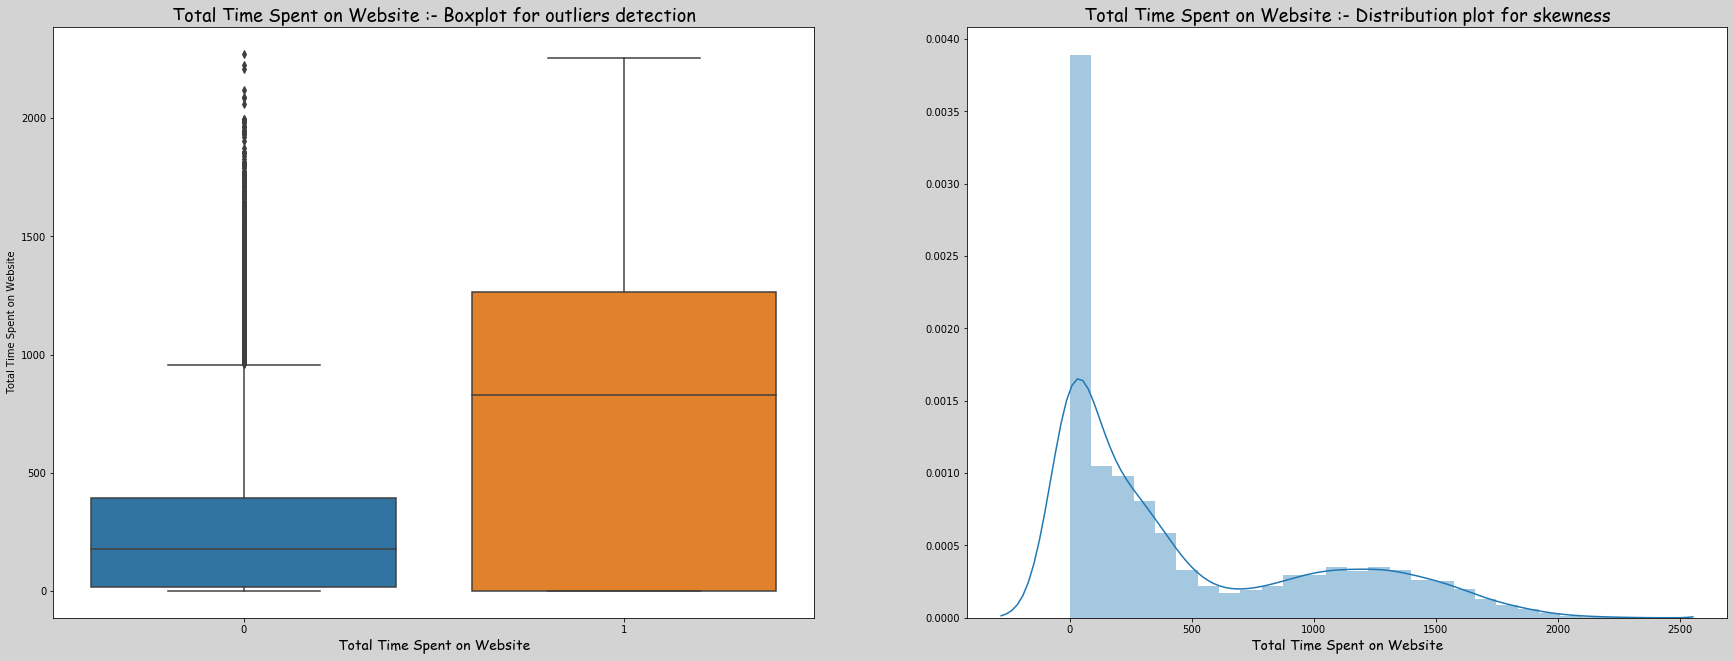

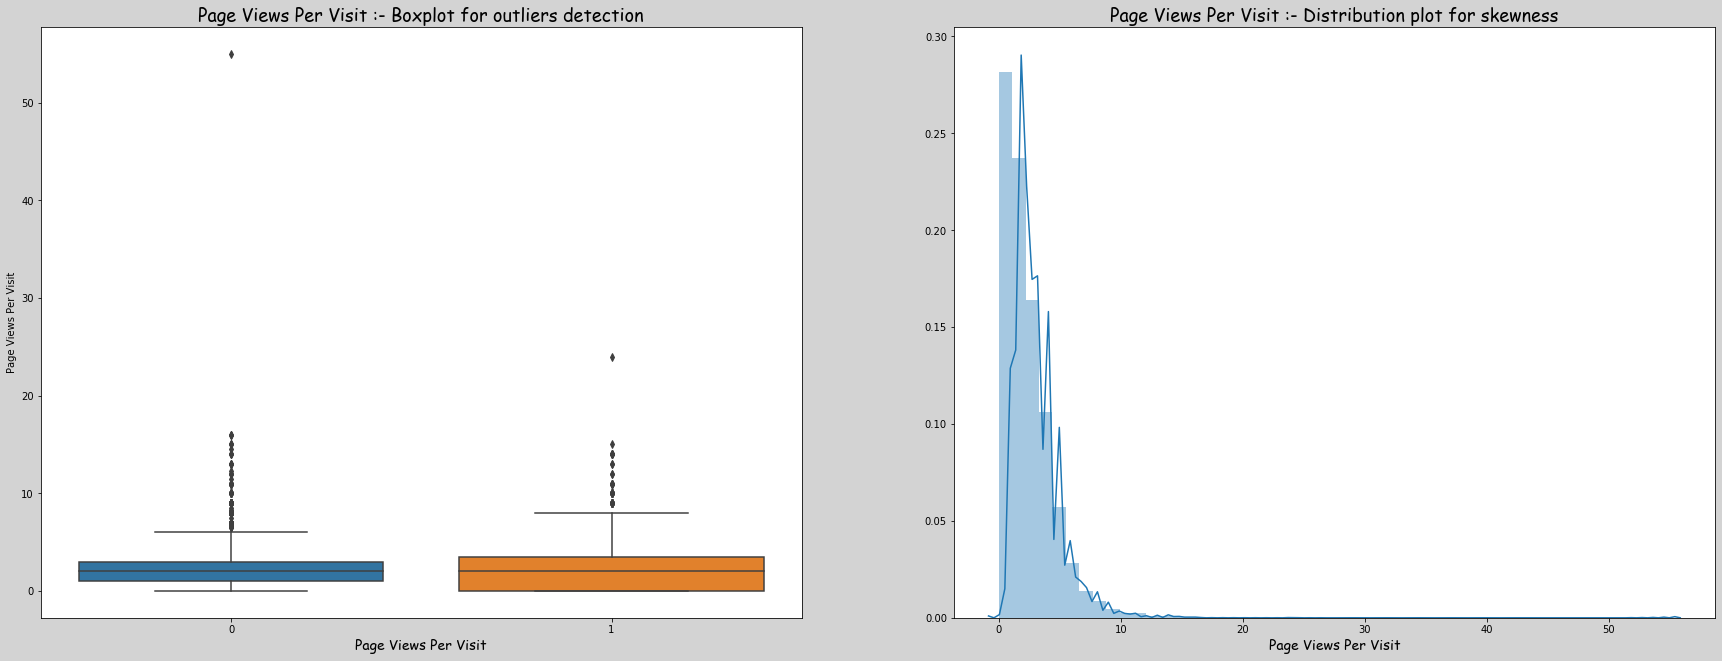

In [252]:
# Checking Outliers and Skewness of the Numerical variable
colnames_num = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
outliers_graphs(lead_score_data,colnames_num)

## Inference
- Based on above graph **"Total Visits" & "Page Views Per Visit"** are having large no. of outliers. We can cap to 95% value for analysis.
- The plot seemed to be right-skewed for **"Total Visits" & "Page Views Per Visit"**.
- **Total Time Spent on Website"** is not perfect bel curve but the lead converted is more when time spent is more. Hence not handling the outliers.
- **Total Time Spent on Website"** - More time spent more likely to be converted.
- Website should be made more engaging to make leads spend more time.



In [253]:
print(lead_score_data.TotalVisits.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.95,0.99,1]))

count   9074.00
mean       3.46
std        4.86
min        0.00
25%        1.00
50%        3.00
75%        5.00
85%        6.00
90%        7.00
95%       10.00
99%       17.00
100%     251.00
max      251.00
Name: TotalVisits, dtype: float64


In [254]:
#Outlier Treatment: Remove top 5% & bottom 1% of the Column Outlier values

Q3 = lead_score_data.TotalVisits.quantile(0.95)
lead_score_data = lead_score_data[(lead_score_data.TotalVisits <= Q3)]
Q1 = lead_score_data.TotalVisits.quantile(0.01)
lead_score_data = lead_score_data[(lead_score_data.TotalVisits >= Q1)]
plt.show()

In [255]:
#Outlier Treatment: Remove top & bottom 5% 

Q3 = lead_score_data['Page Views Per Visit'].quantile(0.95)
lead_score_data = lead_score_data[lead_score_data['Page Views Per Visit'] <= Q3]
Q1 = lead_score_data['Page Views Per Visit'].quantile(0.05)
lead_score_data = lead_score_data[lead_score_data['Page Views Per Visit'] >= Q1]
plt.show()

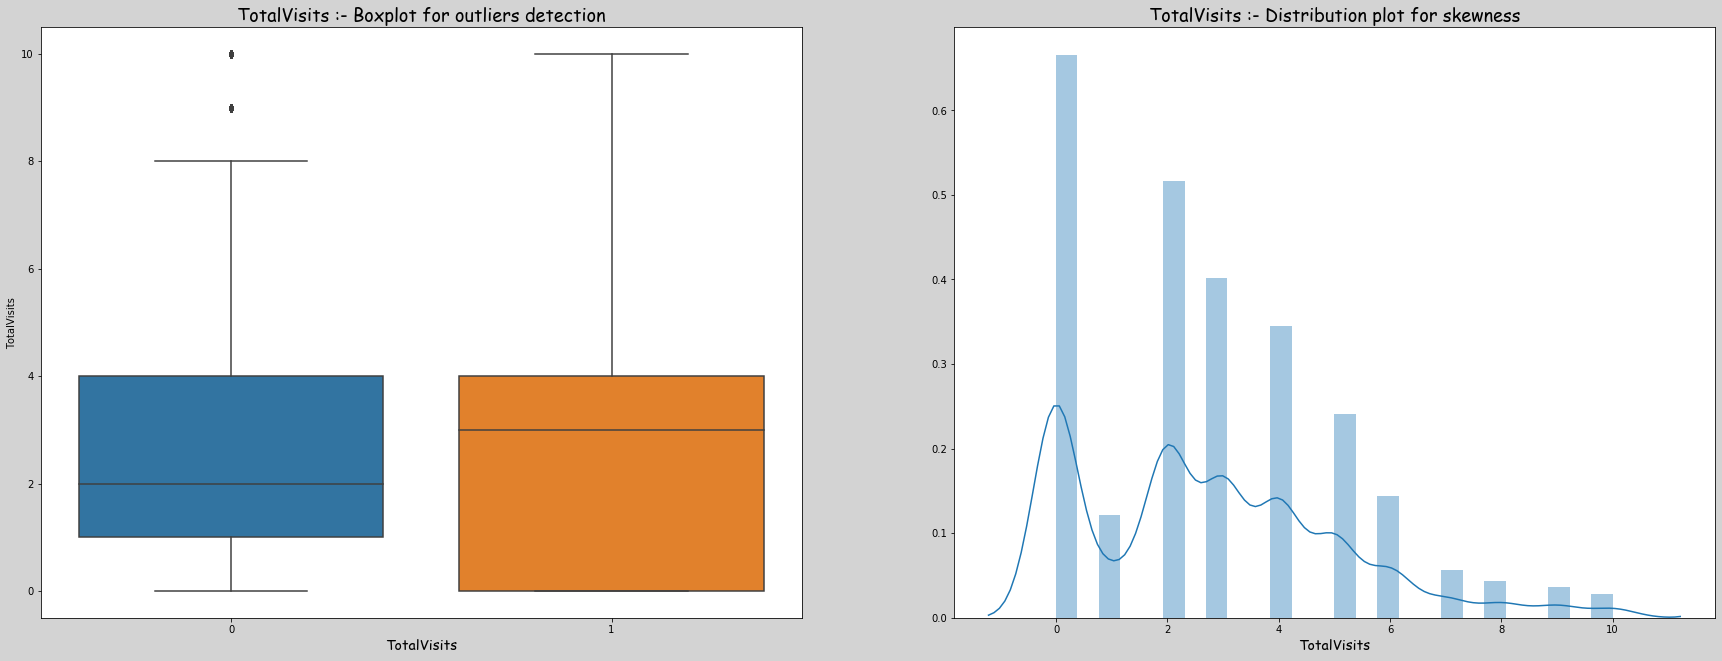

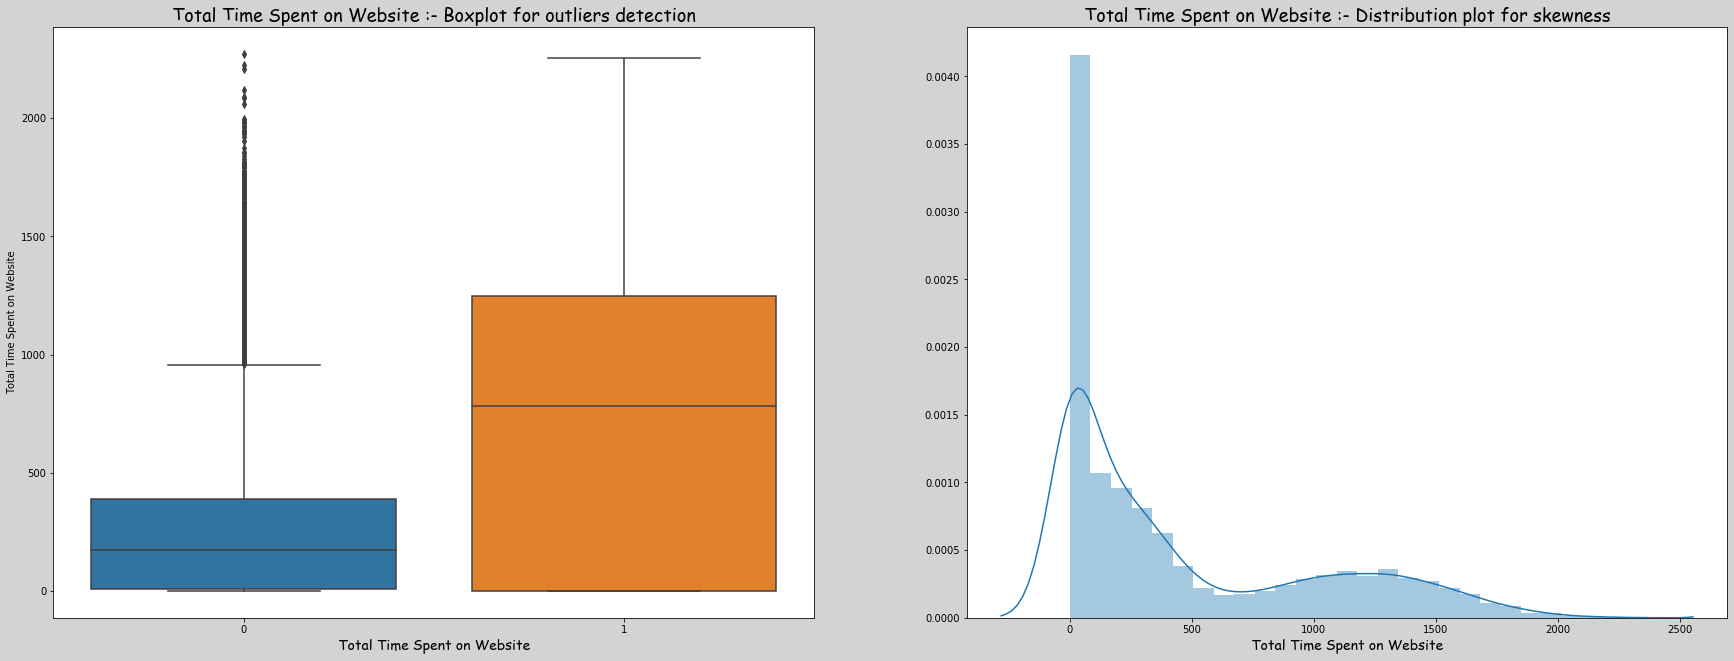

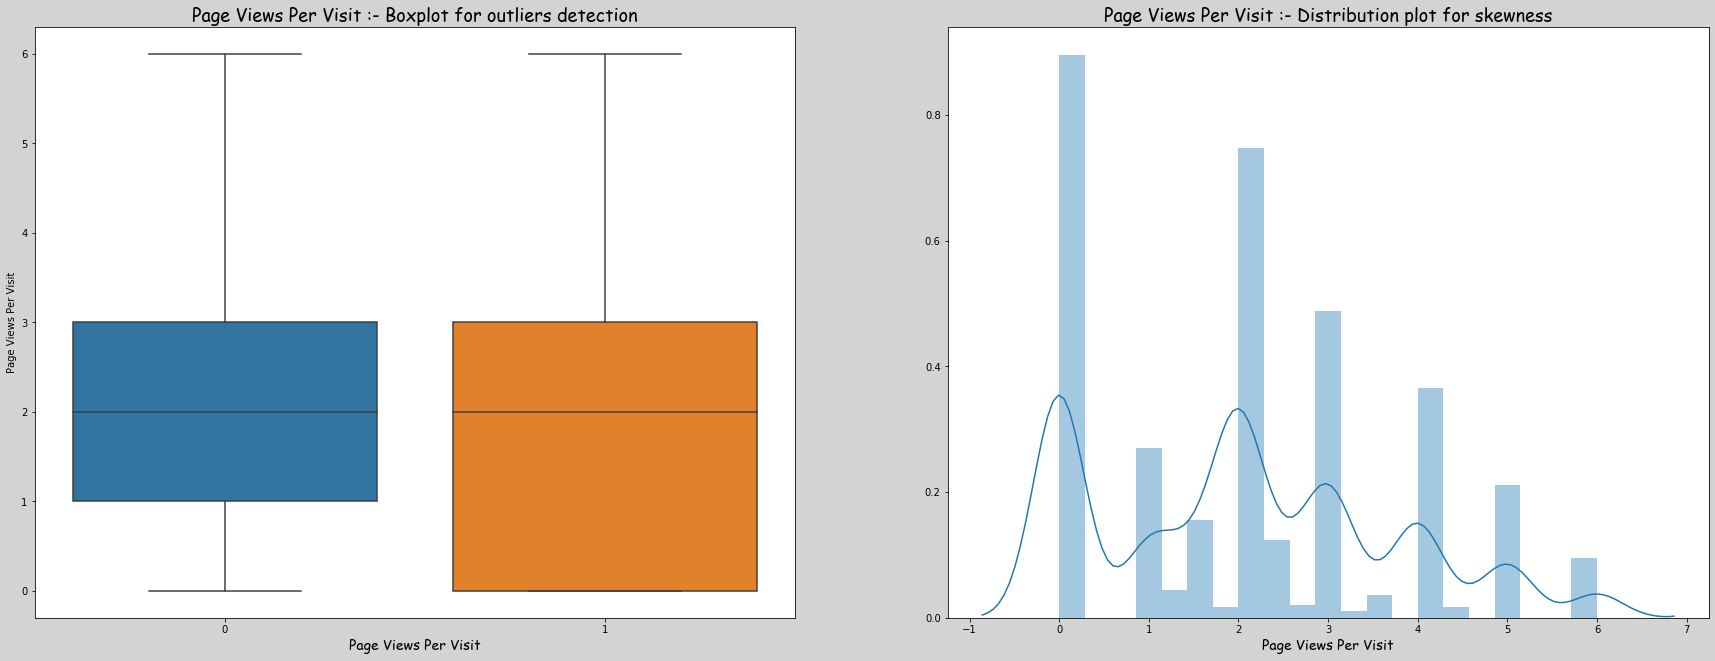

In [256]:
# After removing the outliers, checking Outliers and Skewness of the Numerical variable 
colnames_num = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
outliers_graphs(lead_score_data,colnames_num)

## Inference
- **Pages Views Per Visit** - Median for converted and unconverted leads is the same.

Nothing can be said specifically for lead conversion from Page Views Per Visit


In [257]:
lead_score_data.shape

(8445, 16)

In [258]:
lead_score_data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8445.00,8445.00,8445.00,8445.00
mean,0.37,2.75,468.57,2.07
std,0.48,2.33,541.70,1.65
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,0.00,2.00,233.00,2.00
75%,1.00,4.00,886.00,3.00
max,1.00,10.00,2272.00,6.00


## Data Preparation

- Encoding categorical features
- Rescaling the features
- Splitting the Data into Training and Testing Sets

In [259]:
# Divide the data into Numeric and categorical data  
col_numeric = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# Numeric Data
numeric_data=lead_score_data[list(lead_score_data.select_dtypes(col_numeric).columns)]

# Categorical Data
categorical_data=lead_score_data[list(lead_score_data.select_dtypes(exclude=col_numeric).columns)]
categorical_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

## Creating dummy variables using get_dummies function

In [260]:
lead_score_dummy = pd.get_dummies(lead_score_data[categorical_data.columns], drop_first=True)
lead_score_dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Misc_Lead_Source,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,...,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Misc_Notable_Activity,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Merging dummy variables
- Creating a copy of original data set.
- droping the categorical variables from full dataset.
- Merging dummy variables into full data set.

In [261]:
#Create a copy of leads score data to add these dummies to the whole data
lead_score_data_bkp = lead_score_data.copy(deep=True)

In [262]:
leads = lead_score_data.drop(categorical_data.columns, axis = 1)

In [263]:
leads = pd.concat([leads, lead_score_dummy], axis=1)

In [264]:
leads.shape

(8445, 81)

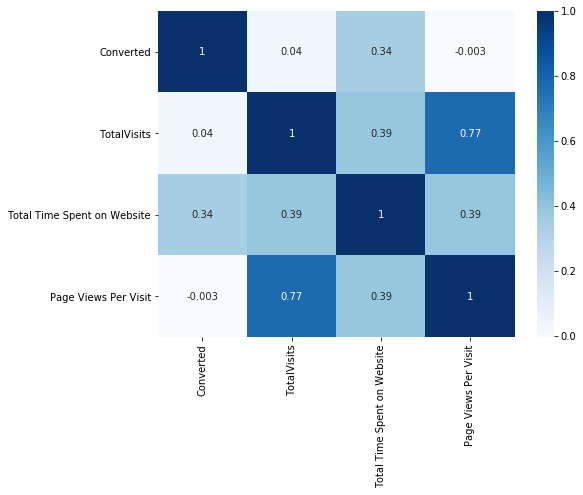

In [265]:
plt.figure(figsize = (8,6))        
ax = sns.heatmap(lead_score_data.corr(),annot = True,cmap="Blues")

## Inference
- TotalVisits & Page Views Per Visits are having significant correlation, hence removing it.

In [266]:
# Total Visits and Page Views Per Visit are significantly correlated, hence we drop one of those
leads = leads.drop("Page Views Per Visit", axis = 1)

## Seperating Target variable with other Feature

In [267]:
# Creating target variable as y and remaining as X
X = leads.drop(['Converted'], axis=1)
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [268]:
X.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Misc_Lead_Source,Lead Source_Olark Chat,Lead Source_Organic Search,...,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Misc_Notable_Activity,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0.00,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,5.00,674,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,2.00,1532,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,1.00,305,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2.00,1428,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Splitting the Data into Training and Testing Sets

In [269]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [270]:
X_train[['TotalVisits','Total Time Spent on Website']].describe()

,TotalVisits,Total Time Spent on Website
count,5911.00,5911.00
mean,2.74,467.35
std,2.34,539.94
min,0.00,0.00
25%,0.00,0.00
50%,2.00,233.00
75%,4.00,886.50
max,10.00,2253.00


## Rescaling the Features

As per above table, features are varying in different ranges. This will be problem. It is important that we rescale the feature such that thay have a comparable scales. This can lead us time consuming during model evaluation.

So it is advices to Standardization and normalization so that units of coefficients obtained are in same scale. Two common ways of rescaling are

- Standardization (mean-0, sigma-1)
- Min-Max scaling (Normization)

In this case we are using Min-Max scaling

In [271]:

scaler =  MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Misc_Lead_Source,Lead Source_Olark Chat,Lead Source_Organic Search,...,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Misc_Notable_Activity,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
5279,0.20,0.09,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3099,0.20,0.09,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
91,0.60,0.51,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
1577,0.00,0.00,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
487,0.20,0.06,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Training the Model

In [272]:
numeric_data=X_train[list(X_train.select_dtypes(col_numeric).columns)]
numeric_data.columns

Index(['TotalVisits', 'Total Time Spent on Website'], dtype='object')

In [273]:
# Running RFE with the output number of the variable equal to 15
logreg = LogisticRegression()

rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [274]:
rfe.support_
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 40),
 ('Total Time Spent on Website', True, 1),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 21),
 ('Lead Source_Facebook', False, 31),
 ('Lead Source_Google', False, 52),
 ('Lead Source_Misc_Lead_Source', False, 51),
 ('Lead Source_Olark Chat', False, 16),
 ('Lead Source_Organic Search', False, 50),
 ('Lead Source_Reference', False, 53),
 ('Lead Source_Referral Sites', False, 47),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Email Bounced', False, 45),
 ('Last Activity_Email Link Clicked', False, 27),
 ('Last Activity_Email Opened', False, 37),
 ('Last Activity_Form Submitted on Website', False, 36),
 ('Last Activity_Misc_Last_Avtivity', False, 25),
 ('Last Activity_Olark Chat Conversation', False, 11),
 ('Last Activity_Page Visited on Website', False, 61),
 ('Last Activity_SMS Sent', False, 5),
 ('Last Activity_Unreachable', False

In [275]:
cols=X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Do Not Email_Yes', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [276]:
#Function to fit the logistic regression model from the statmodel package
def fit_LogRegModel(X_train):
    # Adding a constant variable  
    X_train = sm.add_constant(X_train)
    lm = sm.GLM(y_train,X_train,family = sm.families.Binomial()).fit() 
    print(lm.summary())
    return lm

In [277]:
# Calculate the VIFs for the new model
def getVIF(X_train):
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

## Assessing the Model using StatsModels

In [278]:
# Creating X_test dataframe with RFE selected variables
X_train_1 = X_train[cols]

In [279]:
lm_1 = fit_LogRegModel(X_train_1)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5895
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1342.2
Date:                Mon, 02 Mar 2020   Deviance:                       2684.3
Time:                        00:18:11   Pearson chi2:                 2.18e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [280]:
X_train_2 = X_train_1.drop('Tags_invalid number', axis=1)

In [281]:
lm_2 = fit_LogRegModel(X_train_2)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5896
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1344.7
Date:                Mon, 02 Mar 2020   Deviance:                       2689.5
Time:                        00:18:11   Pearson chi2:                 2.17e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [282]:
X_train_3 = X_train_2.drop('Last Notable Activity_Olark Chat Conversation', axis=1)
lm_3 = fit_LogRegModel(X_train_3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5897
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1349.1
Date:                Mon, 02 Mar 2020   Deviance:                       2698.2
Time:                        00:18:12   Pearson chi2:                 2.25e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [283]:
getVIF(X_train_3)

,Features,VIF
8,Tags_Will revert after reading the email,3.28
10,Lead Quality_Not Sure,2.74
0,Total Time Spent on Website,1.85
1,Lead Origin_Lead Add Form,1.63
7,Tags_Ringing,1.61
12,Last Notable Activity_SMS Sent,1.53
2,Lead Source_Welingak Website,1.27
5,Tags_Closed by Horizzon,1.22
4,Tags_Busy,1.14
9,Tags_switched off,1.12


## Inference
- Now we have good Model with low P-value and low VIF

In [284]:
# Getting the predicted values on the train set
X_train_3 = sm.add_constant(X_train_3)
y_train_pred = lm_3.predict(X_train_3)

In [285]:
col_3 = X_train_3.columns

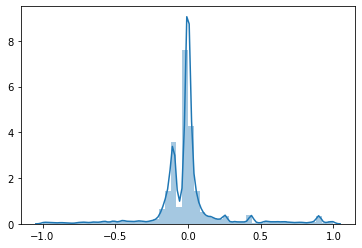

In [286]:
res = y_train - y_train_pred
sns.distplot(res)

# Inference
- The Error distribution is more close to a normal distribution and more centered at 0

In [287]:
# Let's run the model using the selected variables
lr = LogisticRegression(C=1.0)
lr.fit(X_train[cols], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [288]:
# Predicted probabilities
y_pred = lr.predict_proba(X_train[cols])

In [289]:
print(y_pred)

[[0.94576073 0.05423927]
 [0.36244385 0.63755615]
 [0.59226261 0.40773739]
 ...
 [0.46266738 0.53733262]
 [0.61601206 0.38398794]
 [0.99777124 0.00222876]]


In [290]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.head()

,0,1
0,0.95,0.05
1,0.36,0.64
2,0.59,0.41
3,0.01,0.99
4,0.87,0.13


### We would like to get the predicted probabilities for the positive label only

In [291]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.05
1,0.64
2,0.41
3,0.99
4,0.13


In [292]:
# Converting y_train to dataframe
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

,Converted
5279,0
3099,0
91,1
1577,1
487,0


In [293]:
# Putting index to LeadID
y_train_df['Lead_ID'] = y_train_df.index
y_train_df.head()

,Converted,Lead_ID
5279,0,5279
3099,0,3099
91,1,91
1577,1,1577
487,0,487


In [294]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_train_df,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Converted_Probability'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead_ID','Converted','Converted_Probability'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

,Lead_ID,Converted,Converted_Probability
0,5279,0,0.05
1,3099,0,0.64
2,91,1,0.41
3,1577,1,0.99
4,487,0,0.13


In [295]:
# Creating new column 'Predicted' with 1 if Conversion_Rate>0.5 else 0
y_pred_final['Predicted'] = y_pred_final.Converted_Probability.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,Lead_ID,Converted,Converted_Probability,Predicted
0,5279,0,0.05,0
1,3099,0,0.64,1
2,91,1,0.41,0
3,1577,1,0.99,1
4,487,0,0.13,0


In [296]:
# Creating new column "Lead Score" with 1to100 using conversion rates
y_pred_final['Lead Score'] = y_pred_final.Converted_Probability.map( lambda x: round(x*100))
# Let's see the head
y_pred_final.head()

,Lead_ID,Converted,Converted_Probability,Predicted,Lead Score
0,5279,0,0.05,0,5
1,3099,0,0.64,1,64
2,91,1,0.41,0,41
3,1577,1,0.99,1,99
4,487,0,0.13,0,13


## Confusion Matrix calculation with cutoff 0.5
- Accuracy Score
- Precision
- Recall

In [297]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Converted, y_pred_final.Predicted )
confusion

array([[3504,  190],
       [ 296, 1921]], dtype=int64)

In [298]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Predicted)

0.9177804094061919

In [299]:
metrics.precision_score(y_pred_final.Converted, y_pred_final.Predicted)

0.9099952629085741

In [300]:
metrics.recall_score(y_pred_final.Converted, y_pred_final.Predicted)

0.8664862426702752

In [301]:
TP = confusion[1,1] #True positive
TN = confusion[0,0] #True negatives
FP = confusion[0,1] #False positive
FN = confusion[1,0] #False negative

In [302]:
#Calculating sentivity of model
TP/float(TP+FN)

0.8664862426702752

In [303]:
#Calculating specifictiy of model
TN/float(TN+FP)

0.9485652409312398

In [304]:
##Calculating false positive rate of model-predicting converted when customer has not converted
FP/float(TN+FP)

0.051434759068760154

In [305]:
# positive predictive value 
print (TP / float(TP+FP))

0.9099952629085741


In [306]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

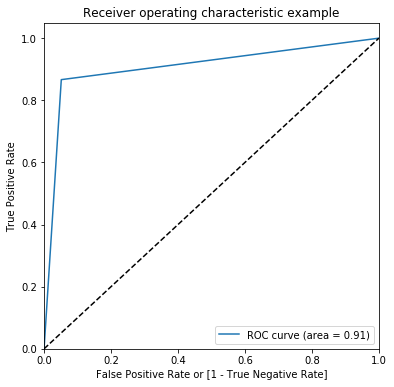

(array([0.        , 0.05143476, 1.        ]),
 array([0.        , 0.86648624, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [307]:
draw_roc(y_pred_final.Converted, y_pred_final.Predicted)


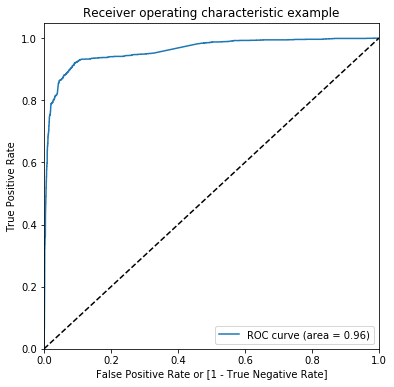

(array([0.        , 0.        , 0.        , ..., 0.99945858, 0.99972929,
        1.        ]),
 array([0.00000000e+00, 4.51059991e-04, 9.02119982e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99981346e+00, 9.99813462e-01, 9.99802461e-01, ...,
        2.07567985e-04, 1.84141372e-04, 1.79888392e-04]))

In [308]:
draw_roc(y_pred_final.Converted, y_pred_final.Converted_Probability)

In [309]:
#draw_roc(y_pred_final.Converted, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.Converted, y_pred_final.Converted_Probability))


'0.96'

## Optimal Cutoff

In [310]:
# Let's create columns with different probability cutoffs 
prob_cutoff = [float(x)/10 for x in range(10)]
for i in prob_cutoff:
    y_pred_final[i]= y_pred_final.Converted_Probability.map(lambda x: 1 if x > i else 0)
y_pred_final.head()



,Lead_ID,Converted,Converted_Probability,Predicted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,5279,0,0.05,0,5,1,0,0,0,0,0,0,0,0,0
1,3099,0,0.64,1,64,1,1,1,1,1,1,1,0,0,0
2,91,1,0.41,0,41,1,1,1,1,1,0,0,0,0,0
3,1577,1,0.99,1,99,1,1,1,1,1,1,1,1,1,1
4,487,0,0.13,0,13,1,1,0,0,0,0,0,0,0,0


In [311]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]

cutoff_df.head()

,Probability,Accuracy,Sensitivity,Specificity
0.00,0.00,0.38,1.00,0.00
0.10,0.10,0.70,0.98,0.53
0.20,0.20,0.90,0.93,0.88
0.30,0.30,0.91,0.92,0.91
0.40,0.40,0.91,0.89,0.93


<Figure size 576x432 with 0 Axes>

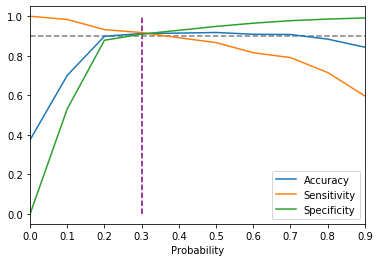

In [312]:
fig = plt.figure(figsize = (8,6))
fig.set_facecolor("lightgrey")

# Let's plot Accuracy Sensitivity and Specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.vlines(x=0.3,ymax=1,ymin=0.0,color="purple",linestyles="--")
plt.hlines(y=0.9,xmax=8,xmin=0.0,color="grey",linestyles="--")
plt.show()


## Inference
- From the above it is clear that 0.3 is the optimum point to take it as a cutoff probability to predict the final probability

In [313]:
#  0.3 is the optimum point to take it as a cutoff probability tp predict the final probability

y_pred_final['Final_Prediction'] = y_pred_final.Converted_Probability.map( lambda x: 1 if x > 0.3 else 0)
y_pred_final.head(10)

,Lead_ID,Converted,Converted_Probability,Predicted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Prediction
0,5279,0,0.05,0,5,1,0,0,0,0,0,0,0,0,0,0
1,3099,0,0.64,1,64,1,1,1,1,1,1,1,0,0,0,1
2,91,1,0.41,0,41,1,1,1,1,1,0,0,0,0,0,1
3,1577,1,0.99,1,99,1,1,1,1,1,1,1,1,1,1,1
4,487,0,0.13,0,13,1,1,0,0,0,0,0,0,0,0,0
5,758,0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0
6,7260,0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0
7,7538,0,0.05,0,5,1,0,0,0,0,0,0,0,0,0,0
8,2404,0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0
9,8190,0,0.05,0,5,1,0,0,0,0,0,0,0,0,0,0


## Confusion Matrix calculation after using optimal Cutoff 0.3

In [314]:
# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Prediction )
confusion_matrix

array([[3360,  334],
       [ 183, 2034]], dtype=int64)

In [315]:
#Let's check the overall accuracy.
print("Logistic regression model Accuracy - ",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Prediction))

#Let's check the overall Precision.
print("\nLogistic regression model Precision - ",metrics.precision_score(y_pred_final.Converted, y_pred_final.Final_Prediction))

#Let's check the overall Recall.
print("\nLogistic regression model Recall - ",metrics.recall_score(y_pred_final.Converted, y_pred_final.Final_Prediction))


TP = confusion_matrix[1,1] #True positive
TN = confusion_matrix[0,0] #True negatives
FP = confusion_matrix[0,1] #False positive
FN = confusion_matrix[1,0] #False negative

#Calculating sentivity of model
print("\nLogistic regression model Sentivity -  ",TP / float(TP+FN))

#Calculating specifictiy of model
print("\nLogistic regression model Specifictiy -  ",TN/float(TN+FP))

##Calculating false positive rate of model-predicting converted when customer has not converted
print("\nFalse positive of model-predicting converted when customer has not converted -  ",FP/float(TN+FP))

# positive predictive value
print("\nLogistic regression model Predictive -  ",TP / float(TP+FP))

Logistic regression model Accuracy -  0.9125359499238708

Logistic regression model Precision -  0.8589527027027027

Logistic regression model Recall -  0.9174560216508796

Logistic regression model Sentivity -   0.9174560216508796

Logistic regression model Specifictiy -   0.9095831077422848

False positive of model-predicting converted when customer has not converted -   0.09041689225771521

Logistic regression model Predictive -   0.8589527027027027


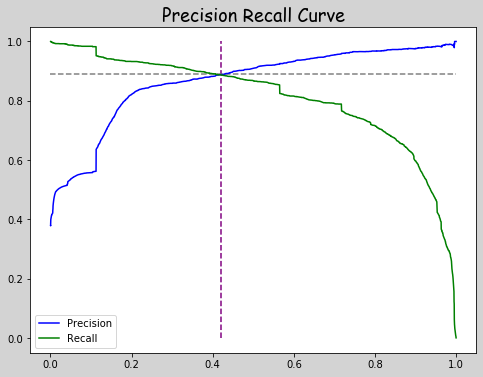

In [316]:
fig = plt.figure(figsize = (8,6))
fig.set_facecolor("lightgrey")

# Precision Recall Curve
precision, recall, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Probability)
plt.plot(thresholds, precision[:-1], "b",label='Precision')
plt.plot(thresholds, recall[:-1], "g",label='Recall')
plt.vlines(x=0.42,ymax=1,ymin=0.0,color="purple",linestyles="--")
plt.hlines(y=0.89,xmax=1,xmin=0.0,color="grey",linestyles="--")
plt.title('Precision Recall Curve',fontsize=18,family = "Comic Sans MS")
plt.legend()
plt.show()



## Inference 
- 0.42 is the tradeoff between Precision and Recall.
- thus we can safely choose to consider any Lead with Conversion Probability higher than 42 % to be a hot Lead


## Making Predictions on test set X_test

In [317]:
X_test[['TotalVisits','Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website']])


In [318]:
col_3 = col_3[1:]

In [319]:
X_test=X_test[cols]
X_test.head()
X_test.shape

(2534, 15)

In [320]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[col_3]

In [321]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [322]:
y_test_pred = lm_3.predict(X_test_new)

In [323]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
1926,0.74
5654,0.74
1209,0.00
5234,0.00
8497,0.08


In [324]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['Lead_ID'] = y_test_df.index

In [325]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [326]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Probability'})
y_pred_final = y_pred_final.reindex(['Lead_ID','Converted','Converted_Probability'], axis=1)
y_pred_final.head()

,Lead_ID,Converted,Converted_Probability
0,1926,1,0.74
1,5654,0,0.74
2,1209,0,0.00
3,5234,0,0.00
4,8497,0,0.08


In [327]:
# Creating new column "Lead Score" with 1to100 using conversion rates
y_pred_final['Lead_Score'] = y_pred_final.Converted_Probability.map( lambda x: round(x*100))
# Let's see the head
y_pred_final.head()

,Lead_ID,Converted,Converted_Probability,Lead_Score
0,1926,1,0.74,74
1,5654,0,0.74,74
2,1209,0,0.00,0
3,5234,0,0.00,0
4,8497,0,0.08,8


In [328]:
y_pred_final['Final_Prediction'] = y_pred_final.Converted_Probability.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head(10)


,Lead_ID,Converted,Converted_Probability,Lead_Score,Final_Prediction
0,1926,1,0.74,74,1
1,5654,0,0.74,74,1
2,1209,0,0.00,0,0
3,5234,0,0.00,0,0
4,8497,0,0.08,8,0
5,1918,0,0.11,11,0
6,7405,0,0.05,5,0
7,6561,0,0.00,0,0
8,5492,1,1.00,100,1
9,7851,1,0.95,95,1


In [329]:
print("Model Accuracy on Test data is ",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Prediction))

Model Accuracy on Test data is  0.9163378058405682


In [330]:
conf_matrix_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Prediction )
conf_matrix_test

array([[1474,  112],
       [ 100,  848]], dtype=int64)

In [331]:
TP = conf_matrix_test[1,1]  
TN = conf_matrix_test[0,0] 
FP = conf_matrix_test[0,1] 
FN = conf_matrix_test[1,0] 

print("Sensitivity of the model on test data is ",round(TP / float(TP+FN),2))

Sensitivity of the model on test data is  0.89


In [332]:
print("Specificity of the model on test data is ",TN / float(TN+FP))

Specificity of the model on test data is  0.9293820933165196


In [333]:
# Calculate false postive rate - predicting converion when customer does not have converted
print(FP/ float(TN+FP))

0.07061790668348046


In [334]:
# Positive predictive value 
print ("Positive predictive ",TP / float(TP+FP))

Positive predictive  0.8833333333333333


In [335]:
# Negative predictive value
print ("Negative predictive value ",TN / float(TN+ FN))

Negative predictive value  0.9364675984752223


In [336]:
# Precision
print(" Precision : ",conf_matrix_test[1,1]/(conf_matrix_test[0,1]+conf_matrix_test[1,1]))

 Precision :  0.8833333333333333


In [337]:
# Recall
print(" Recall : " ,conf_matrix_test[1,1]/(conf_matrix_test[1,0]+conf_matrix_test[1,1]))

 Recall :  0.8945147679324894


In [338]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Probability)

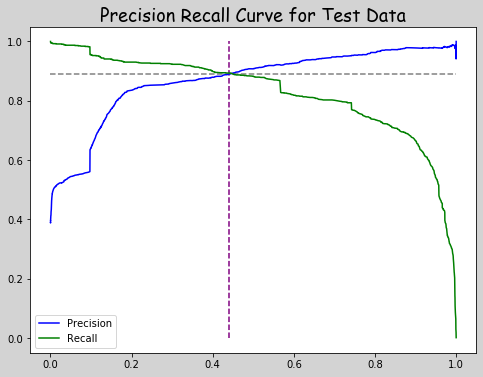

In [339]:
fig = plt.figure(figsize = (8,6))
fig.set_facecolor("lightgrey")

# Precision Recall Curve
precision, recall, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Probability)
plt.plot(thresholds, precision[:-1], "b",label='Precision')
plt.plot(thresholds, recall[:-1], "g",label='Recall')
plt.vlines(x=0.44,ymax=1,ymin=0.0,color="purple",linestyles="--")
plt.hlines(y=0.89,xmax=1,xmin=0.0,color="grey",linestyles="--")
plt.title('Precision Recall Curve for Test Data',fontsize=18,family = "Comic Sans MS")
plt.legend()
plt.show()

In [340]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Converted_Probability, drop_intermediate = False )

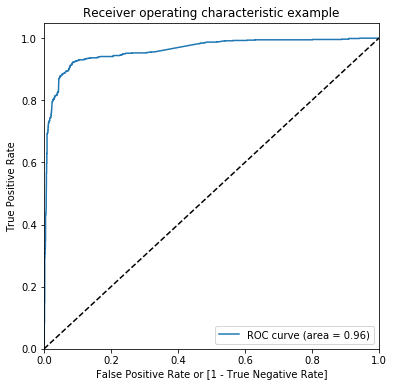

(array([0.        , 0.        , 0.        , ..., 0.99873897, 0.99936948,
        1.        ]),
 array([0.        , 0.00105485, 0.0021097 , ..., 1.        , 1.        ,
        1.        ]),
 array([1.99997137e+00, 9.99971373e-01, 9.99946078e-01, ...,
        1.12508734e-04, 6.53583795e-05, 4.68725287e-05]))

In [341]:
draw_roc(y_pred_final.Converted, y_pred_final.Converted_Probability)

In [342]:
#lead score for customer in the range 0-100
y_test_pred = y_test_pred * 100
y_test_pred[:10]

1926   74.17
5654   74.17
1209    0.33
5234    0.29
8497    8.20
1918   11.23
7405    4.76
6561    0.08
5492   99.63
7851   95.48
dtype: float64

In [343]:
# Selecting the coefficients of the selected features from our final model excluding the intercept
pd.options.display.float_format = '{:.2f}'.format
coeff_param = lm_3.params[1:]
print(type(coeff_param))

<class 'pandas.core.series.Series'>


In [344]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
feature_importance = coeff_param
feature_importance = feature_importance - feature_importance.min()
feature_importance = 100 * feature_importance/feature_importance.max()
feature_importance = pd.DataFrame(feature_importance)
feature_importance.head()

,0
Total Time Spent on Website,57.85
Lead Origin_Lead Add Form,45.78
Lead Source_Welingak Website,57.31
Do Not Email_Yes,20.69
Tags_Busy,61.15


In [345]:
feature_importance['Feature'] = feature_importance.index
feature_importance= feature_importance.rename(columns={ 0 : 'Relative Feature Importance'})
# sorting data frame by name 
feature_importance.sort_values("Relative Feature Importance", axis = 0, ascending = False, 
                 inplace = True, na_position ='first') 
feature_importance.reset_index(drop=True, inplace=True)
feature_importance.head()

,Relative Feature Importance,Feature
0,100.00,Tags_Lost to EINS
1,89.79,Tags_Closed by Horizzon
2,61.15,Tags_Busy
3,59.58,Tags_Will revert after reading the email
4,57.85,Total Time Spent on Website


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

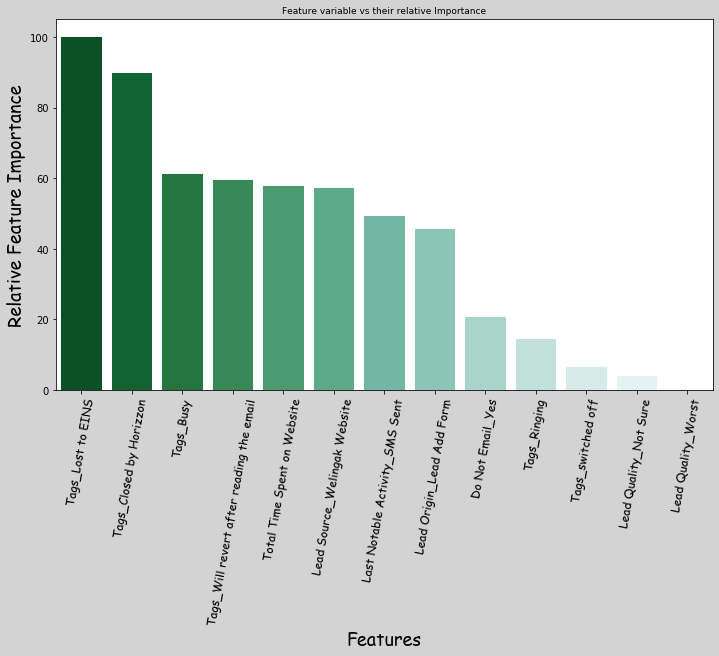

In [350]:
# Plot showing the feature variables based on their relative coefficient values
fig = plt.figure(figsize=(40,15))
fig.set_facecolor("lightgrey")

plt.subplot(2,3,1)
sns.barplot(x='Feature',y='Relative Feature Importance',data=feature_importance,palette="BuGn_r")
plt.title("Feature variable vs their relative Importance",fontsize=9)
plt.xlabel("Features",fontsize=18,family = "Comic Sans MS")
plt.ylabel("Relative Feature Importance",fontsize=18,family = "Comic Sans MS")
plt.xticks(rotation = 80,fontsize=12,family="Comic Sans MS")

We conclude that at threshold probability of 0.30 we are getting an acceptable model with accuracy of 0.9125
which fullfills our business objective of conversion rate of 80%.

Below are the parameers of our model:

Logistic regression model Accuracy -  0.9125359499238708

Logistic regression model Precision -  0.8589527027027027

Logistic regression model Recall -  0.9174560216508796

Logistic regression model Sentivity -   0.9174560216508796

Logistic regression model Specifictiy -   0.9095831077422848

False positive of model-predicting converted when customer has not converted -   0.09041689225771521

Logistic regression model Predictive -   0.8589527027027027

The top 5 features which contribute most to in conversion of lead:
    
1-Tags_Lost to EINS
2-Tags_Closed by Horizzon
3-Tags_busy
4-Tags_Will revert after reading the email
5-Total time spent on website



